In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis

In [ ]:
df_white = pd.read_csv('sample_data/winequality-white.csv', delimiter=";")
df_red = pd.read_csv('sample_data/winequality-red.csv', delimiter=";")

## Evaluating the data

Feature: fixed acidity
Correlation coefficient in regards to quality: -0.114


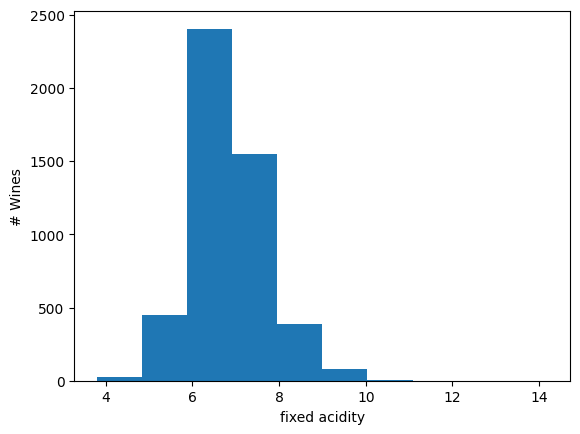

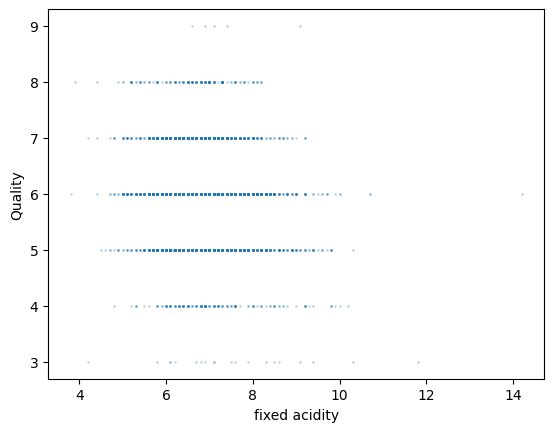

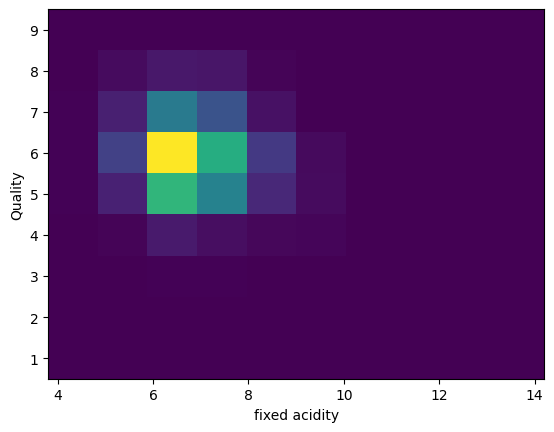

Feature: volatile acidity
Correlation coefficient in regards to quality: -0.195


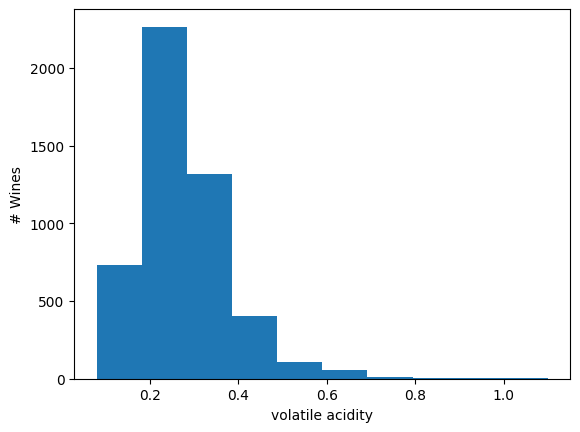

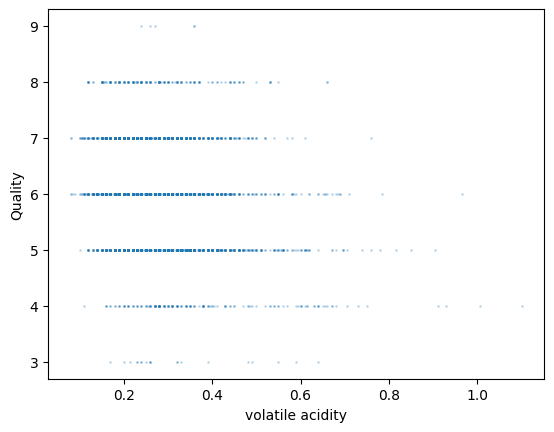

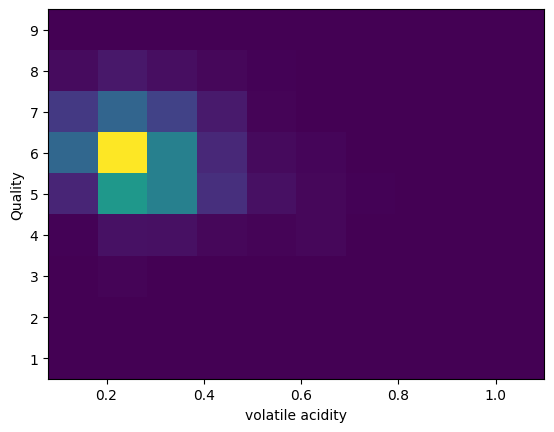

Feature: citric acid
Correlation coefficient in regards to quality: -0.009


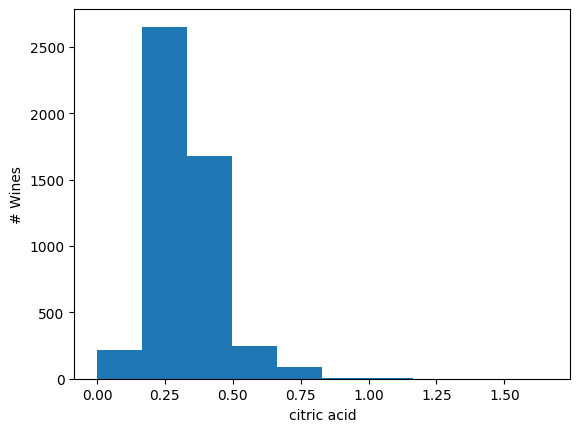

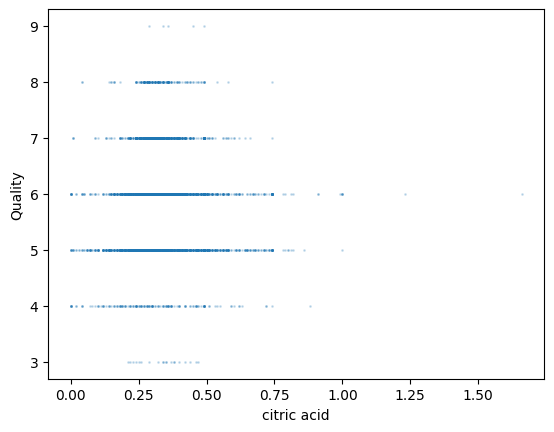

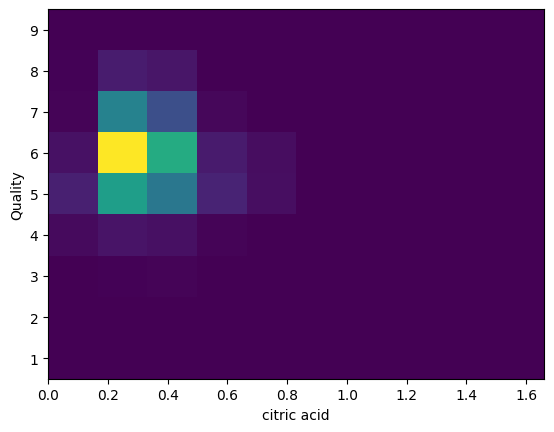

Feature: residual sugar
Correlation coefficient in regards to quality: -0.098


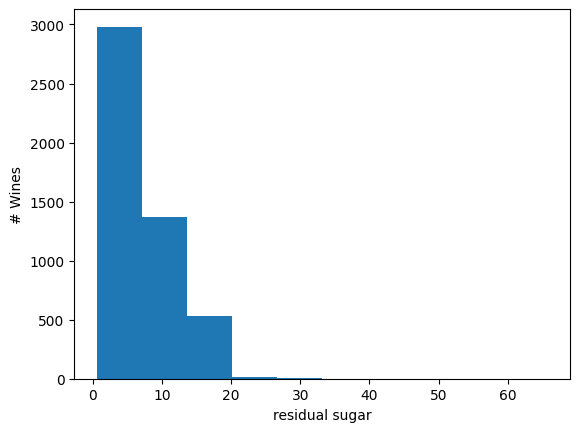

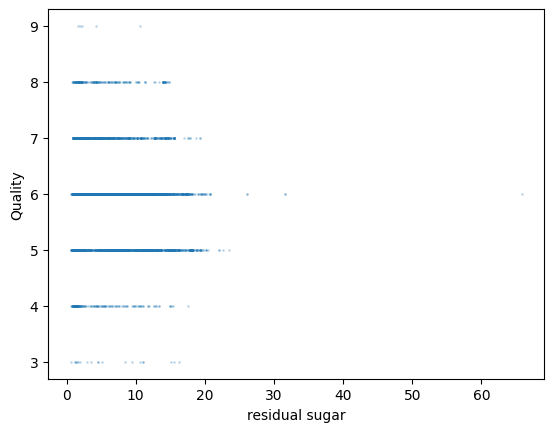

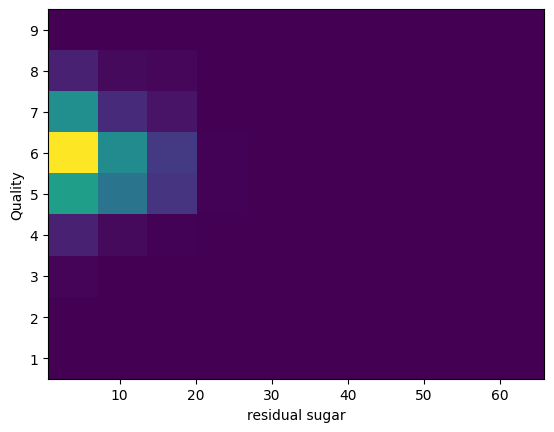

Feature: chlorides
Correlation coefficient in regards to quality: -0.210


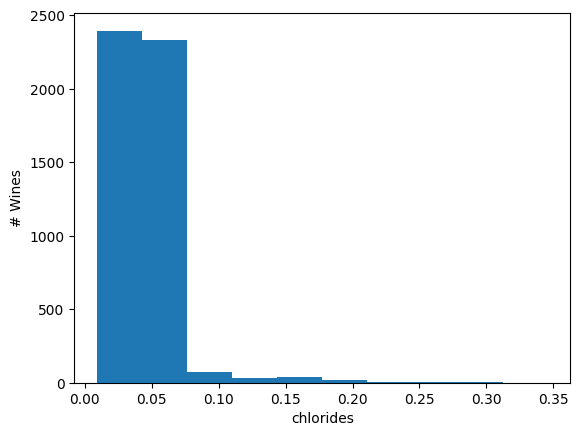

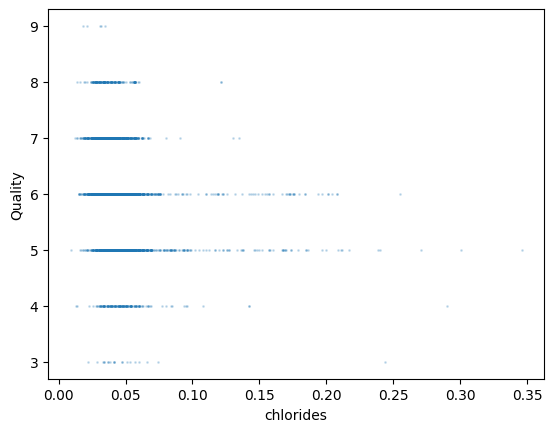

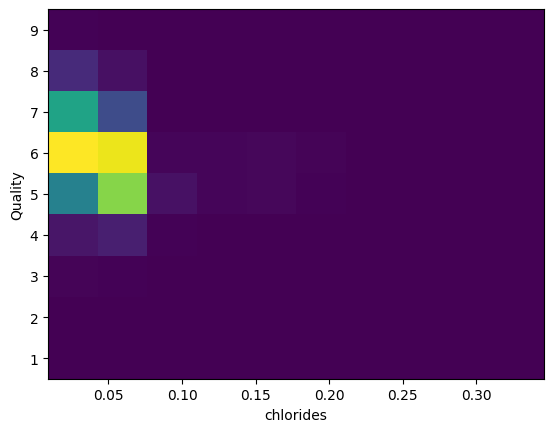

Feature: free sulfur dioxide
Correlation coefficient in regards to quality: 0.008


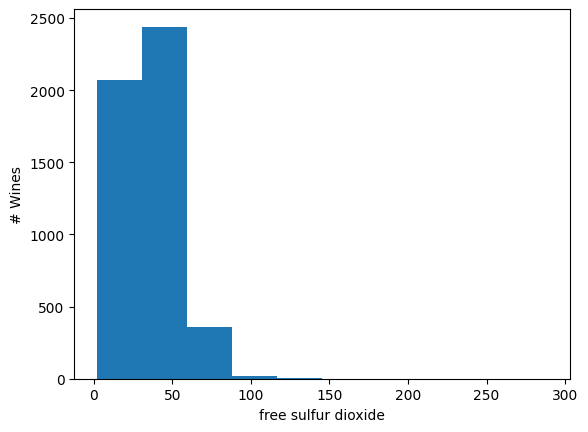

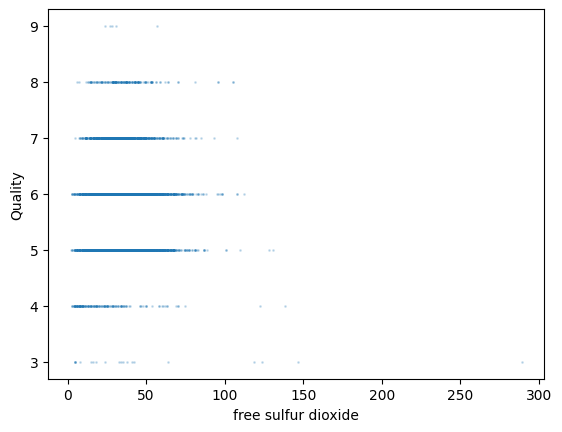

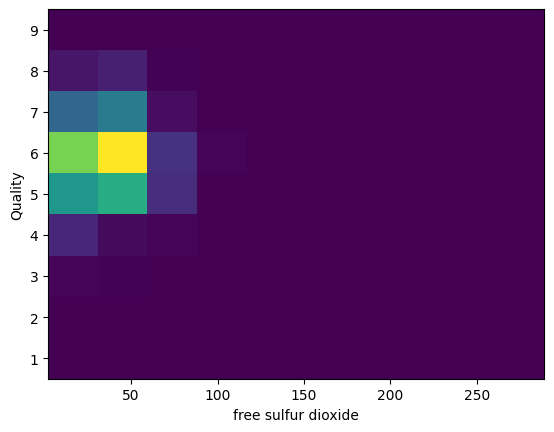

Feature: total sulfur dioxide
Correlation coefficient in regards to quality: -0.175


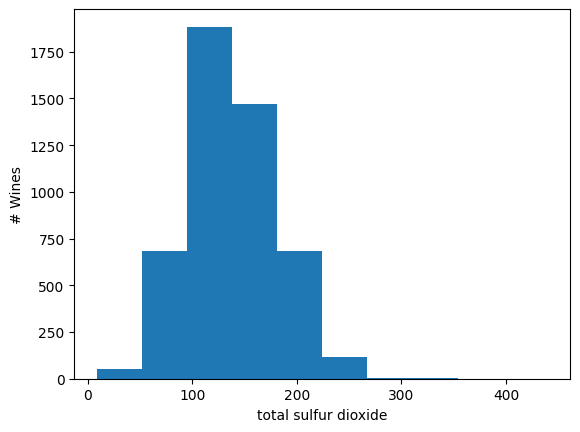

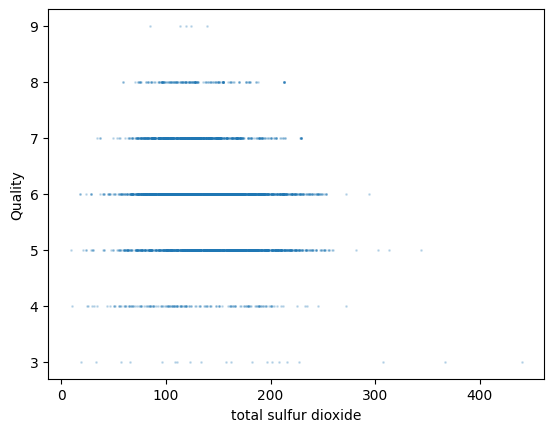

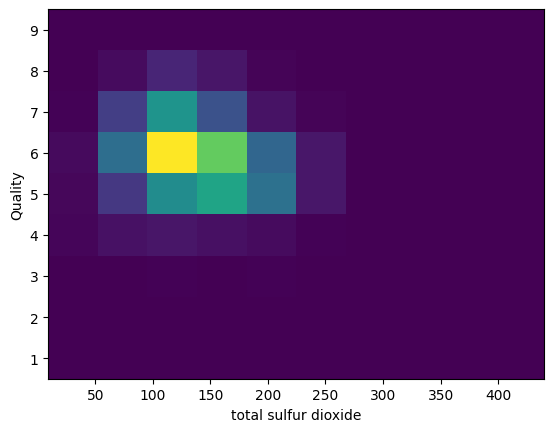

Feature: density
Correlation coefficient in regards to quality: -0.307


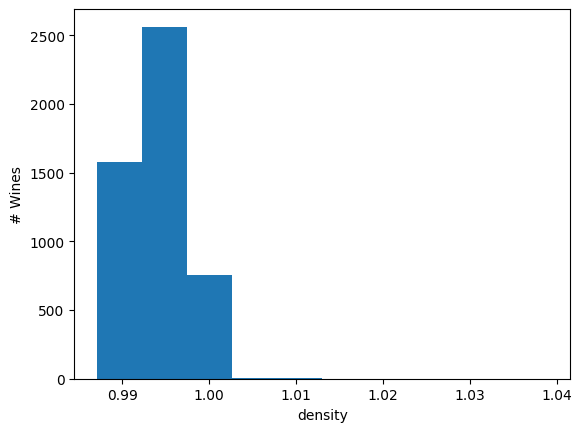

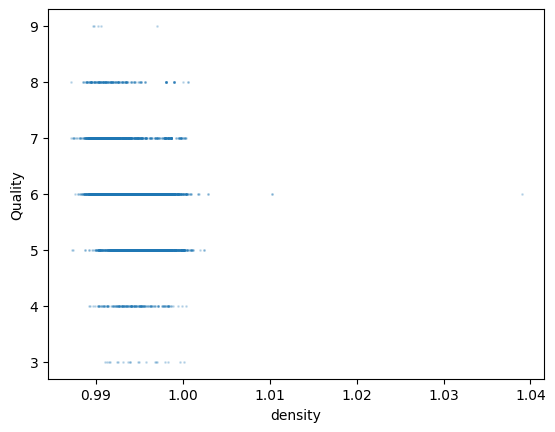

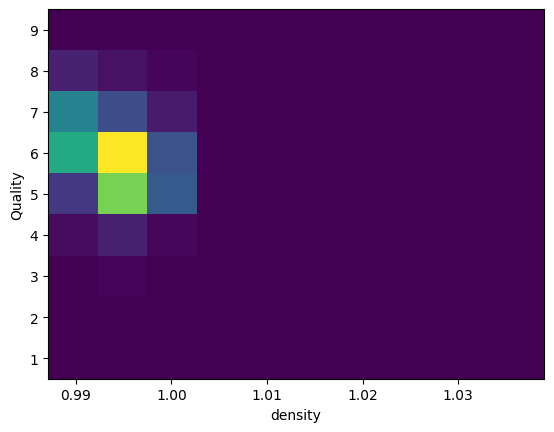

Feature: pH
Correlation coefficient in regards to quality: 0.099


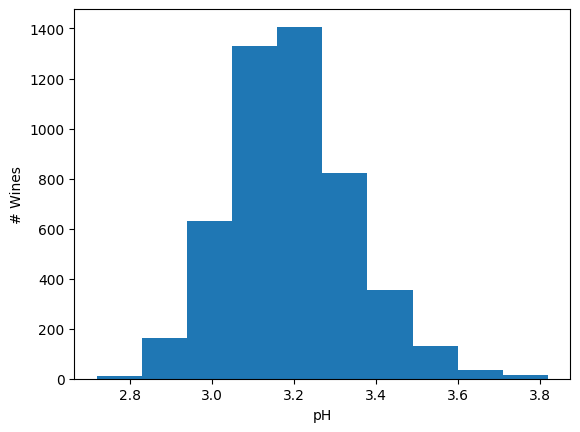

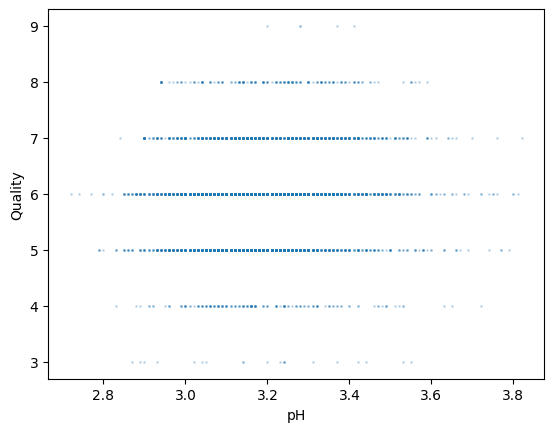

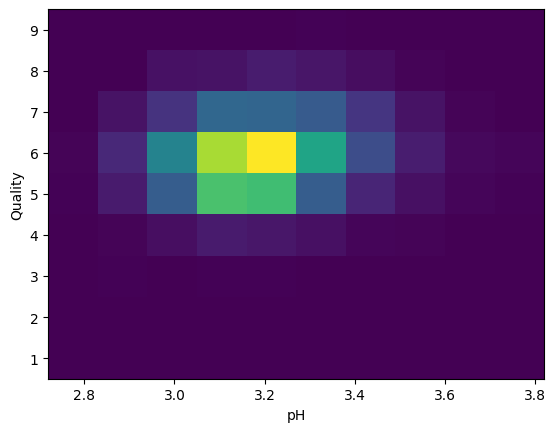

Feature: sulphates
Correlation coefficient in regards to quality: 0.054


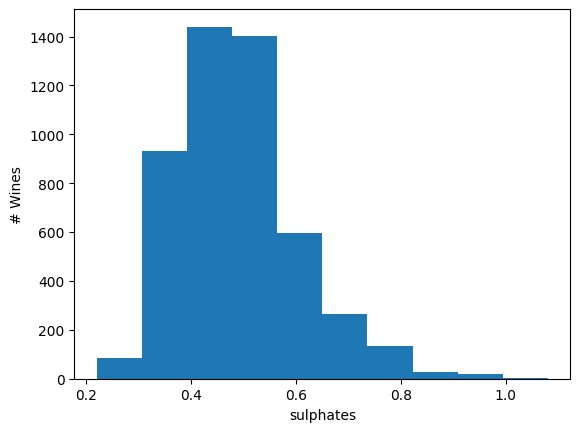

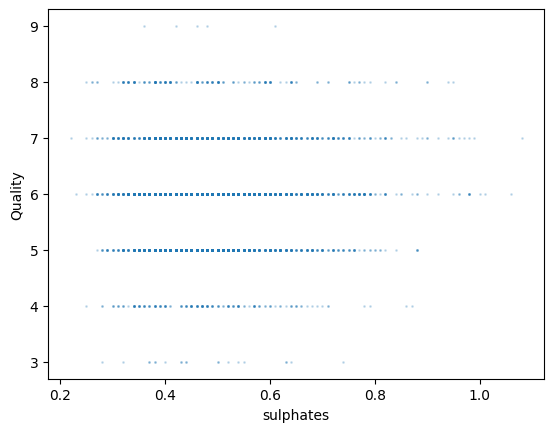

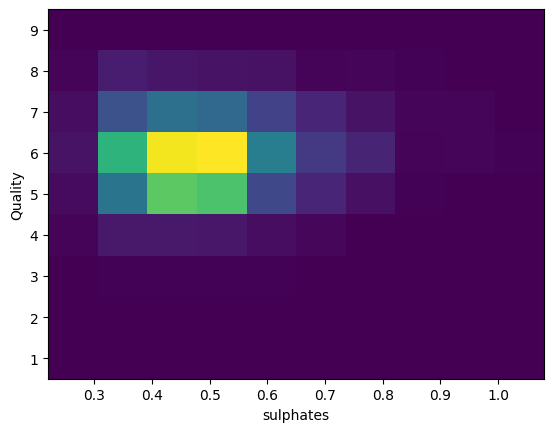

Feature: alcohol
Correlation coefficient in regards to quality: 0.436


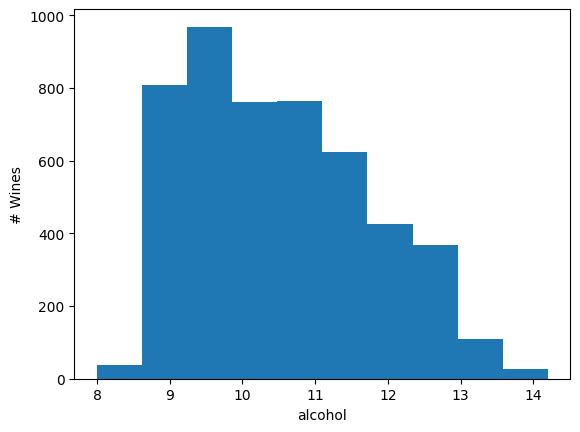

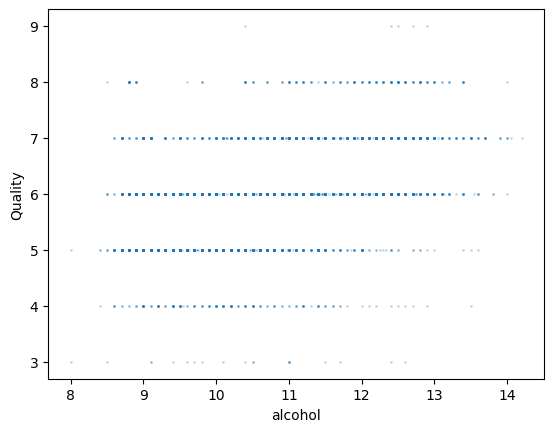

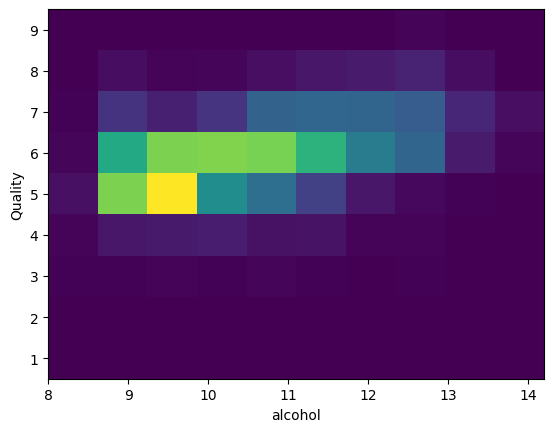

In [ ]:
# Analysing the white wine data
#df_white.head()

features = ["fixed acidity", "volatile acidity", "citric acid",
            "residual sugar", "chlorides", "free sulfur dioxide",
            "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]
cor_coef_lst = []
# Loop over all features
for i_feat, feat in enumerate(features):
    plt.clf()
    print(f"Feature: {feat}")
    print(f"Correlation coefficient in regards to quality: {np.corrcoef(df_white.iloc[:,i_feat],df_white.iloc[:,11])[0,1]:.3f}") # Calulate correlation coefficient
    cor_coef_lst.append(np.corrcoef(df_white.iloc[:,i_feat],df_white.iloc[:,11])[0,1])

    # 1D Histogram
    plt.hist(df_white.iloc[:,i_feat])
    plt.xlabel(feat)
    plt.ylabel("# Wines")
    plt.show()

    # Scatter Plot
    plt.scatter(df_white.iloc[:,i_feat],df_white.iloc[:,11], s=1, alpha=0.2)
    plt.xlabel(feat)
    plt.ylabel("Quality")
    plt.show()

    # Scatter Plot
    plt.hist2d(df_white.iloc[:,i_feat],df_white.iloc[:,11], bins=[10, np.arange(0.5, 10.5, 1)])
    plt.xlabel(feat)
    plt.ylabel("Quality")
    plt.show()

white_max_cor_coef = max(cor_coef_lst)


Feature: fixed acidity
Correlation coefficient in regards to quality: 0.124


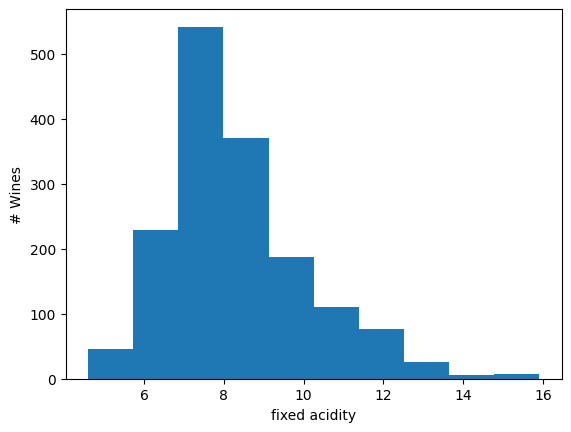

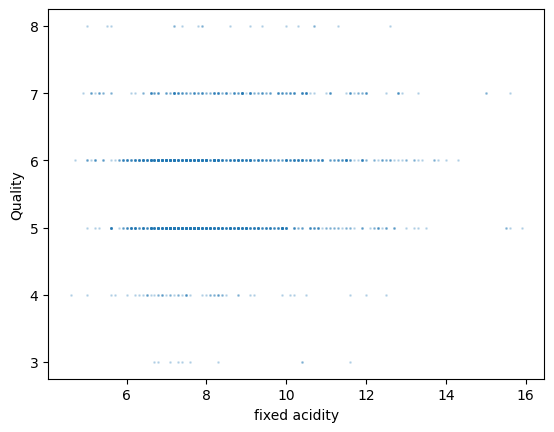

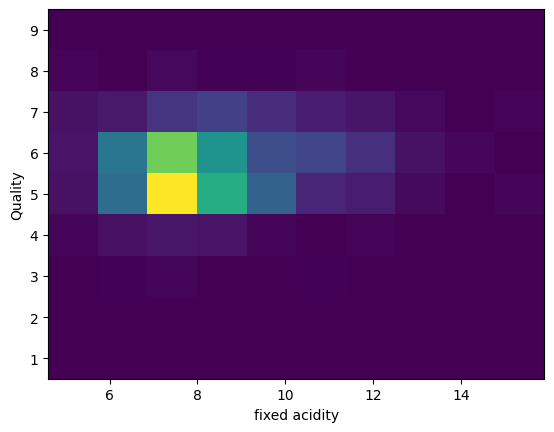

Feature: volatile acidity
Correlation coefficient in regards to quality: -0.391


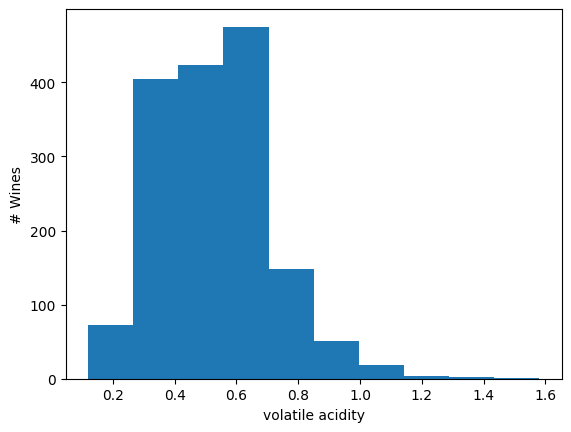

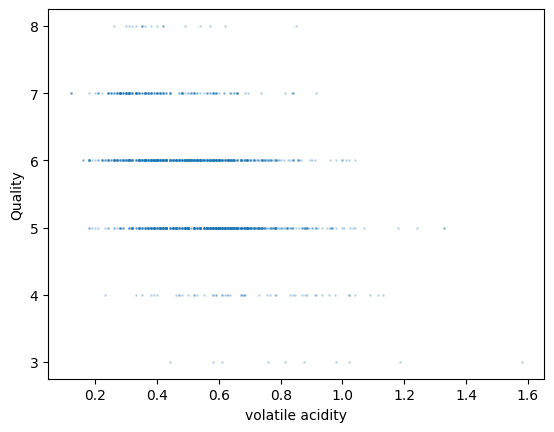

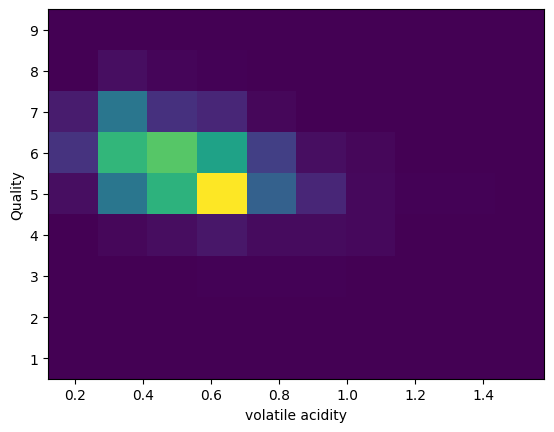

Feature: citric acid
Correlation coefficient in regards to quality: 0.226


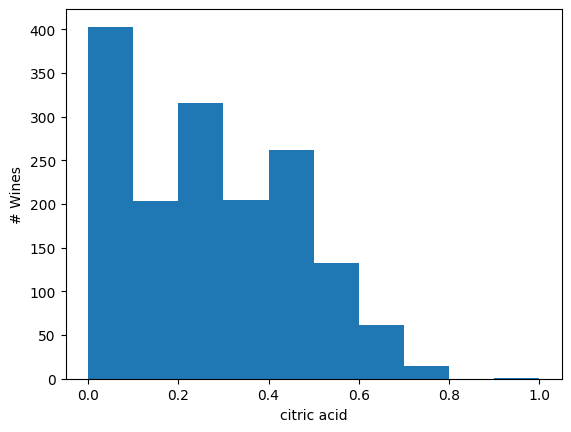

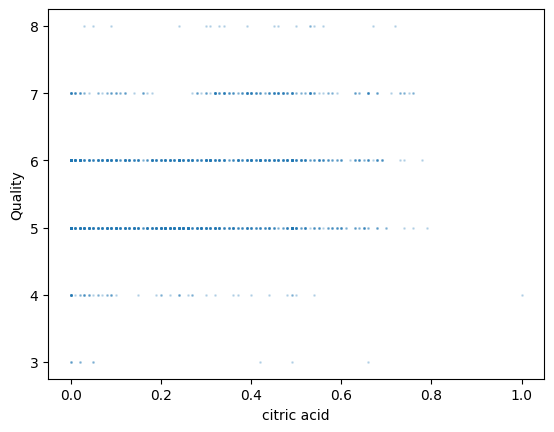

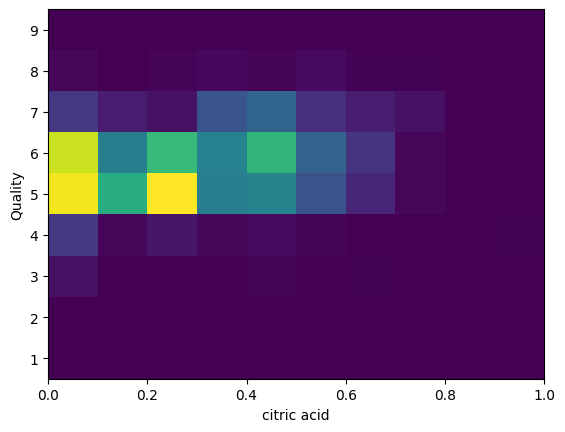

Feature: residual sugar
Correlation coefficient in regards to quality: 0.014


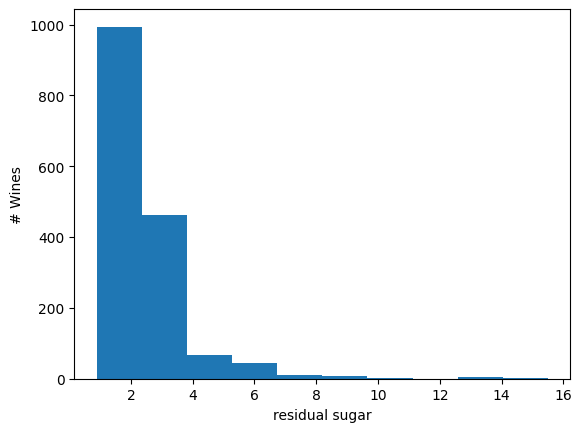

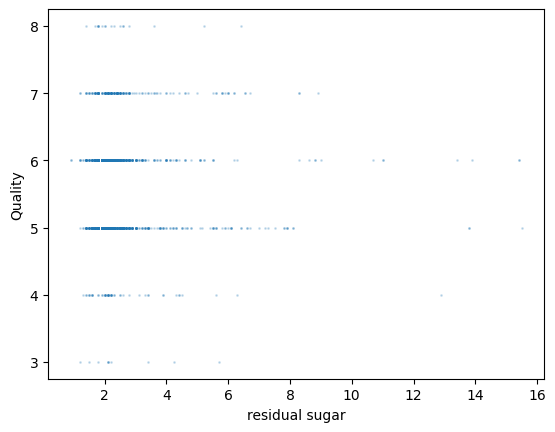

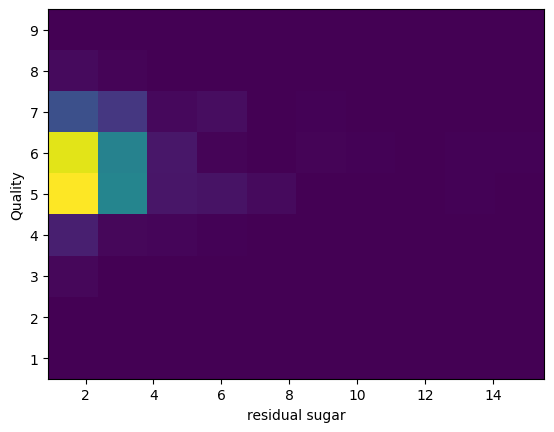

Feature: chlorides
Correlation coefficient in regards to quality: -0.129


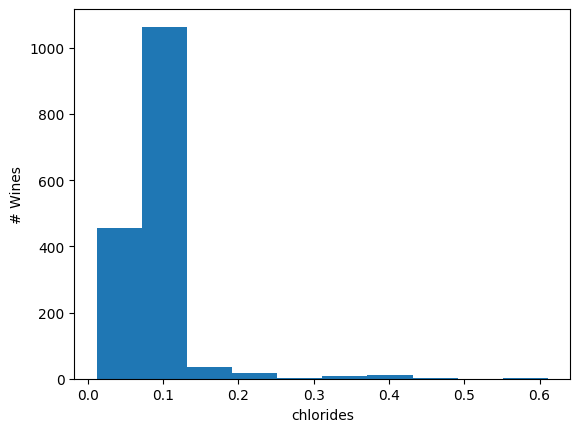

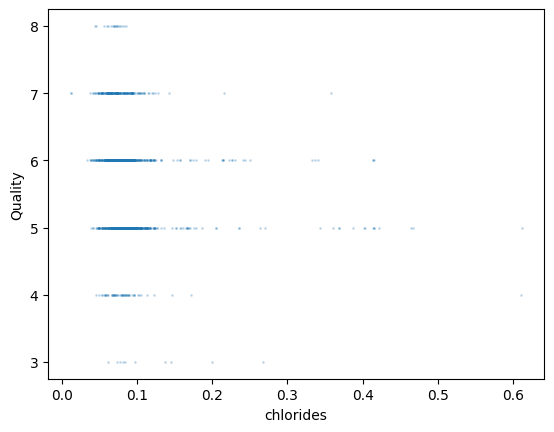

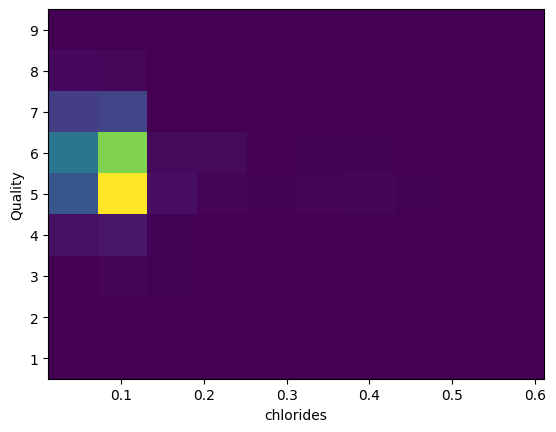

Feature: free sulfur dioxide
Correlation coefficient in regards to quality: -0.051


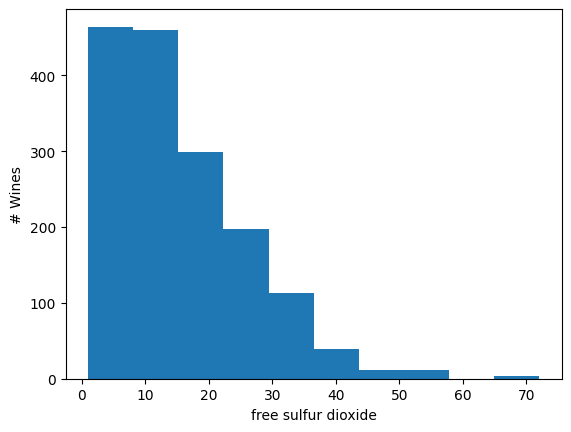

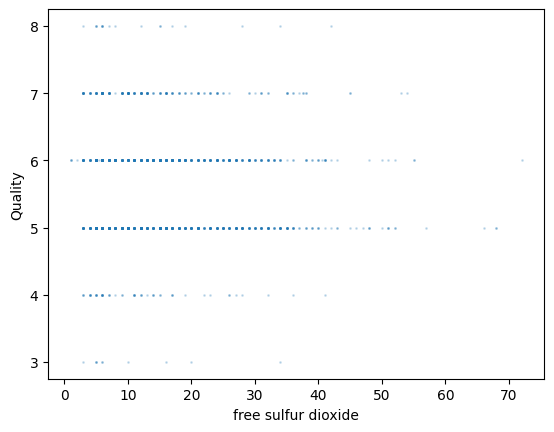

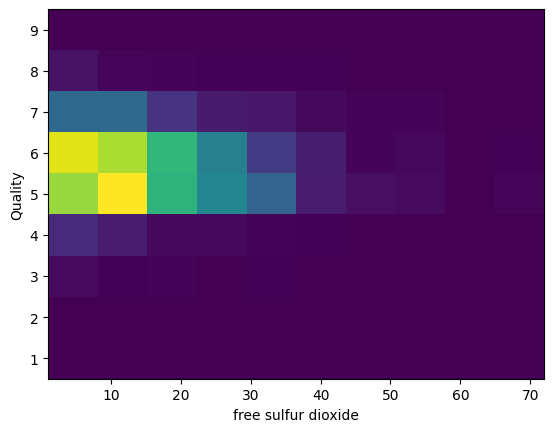

Feature: total sulfur dioxide
Correlation coefficient in regards to quality: -0.185


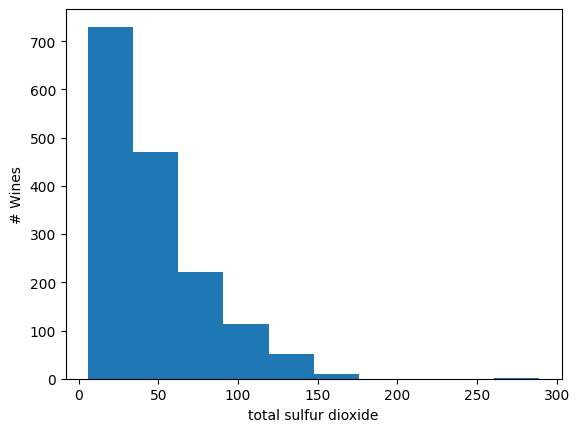

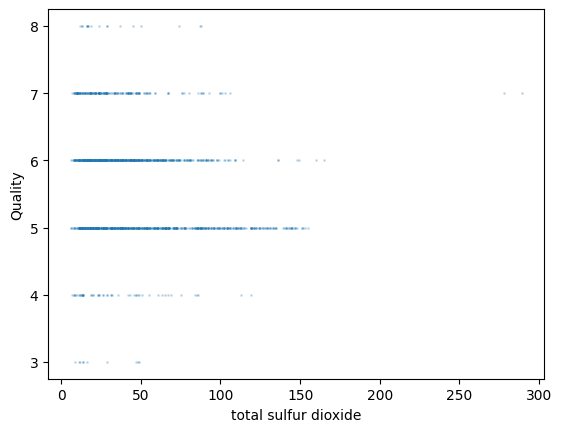

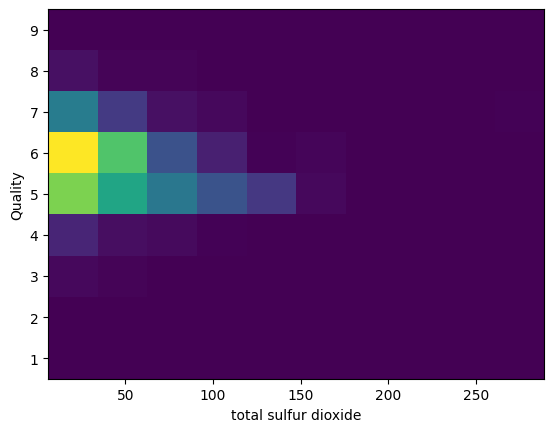

Feature: density
Correlation coefficient in regards to quality: -0.175


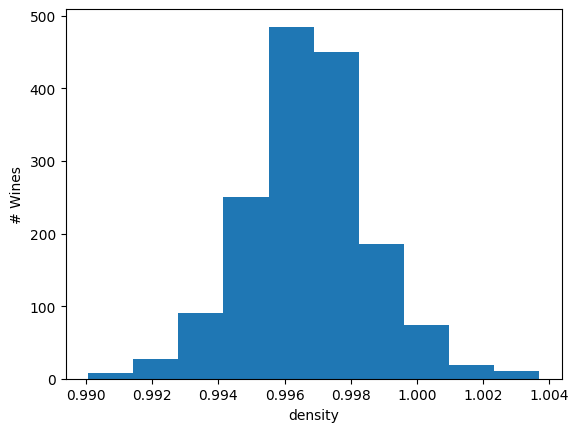

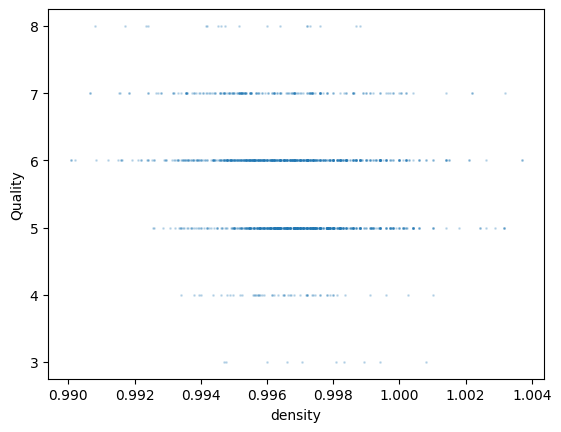

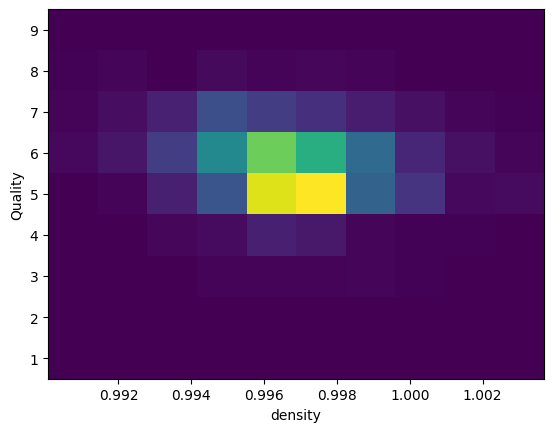

Feature: pH
Correlation coefficient in regards to quality: -0.058


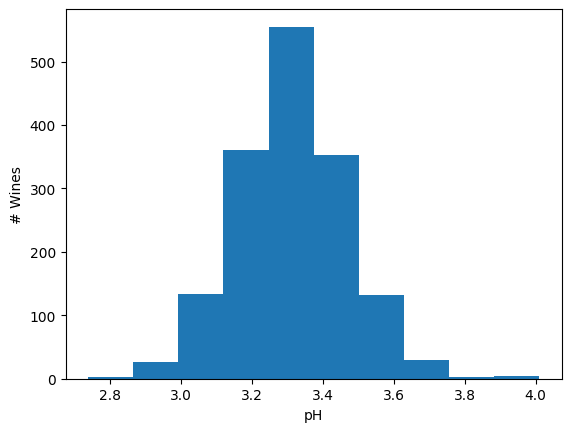

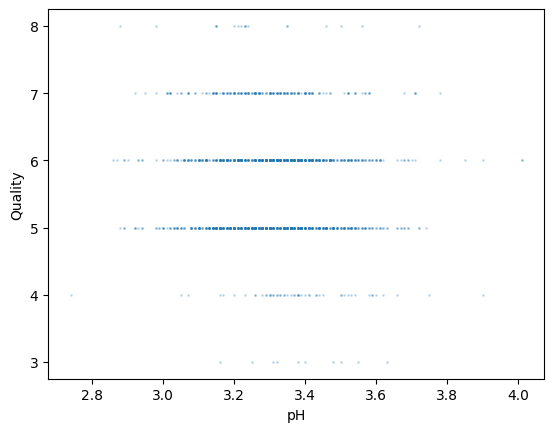

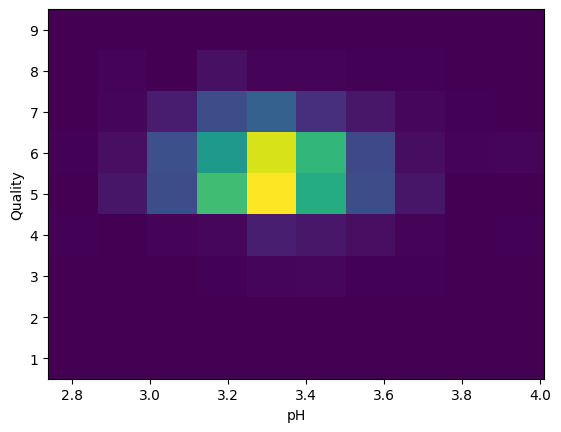

Feature: sulphates
Correlation coefficient in regards to quality: 0.251


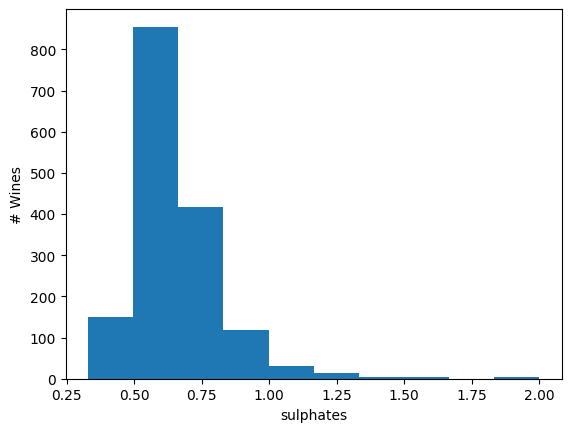

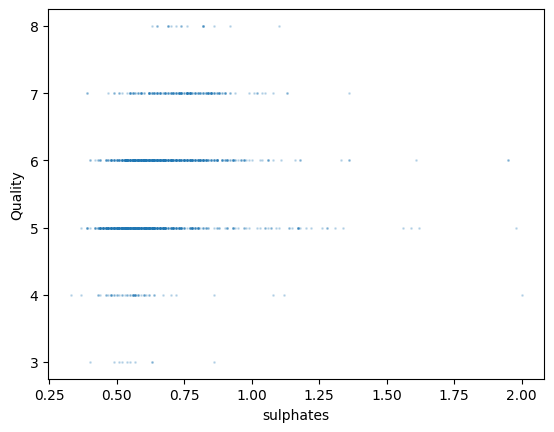

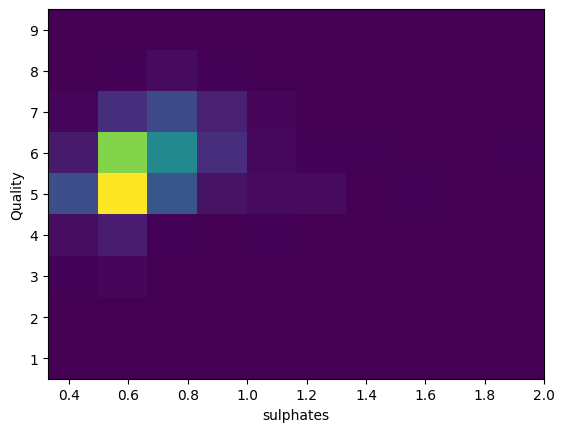

Feature: alcohol
Correlation coefficient in regards to quality: 0.476


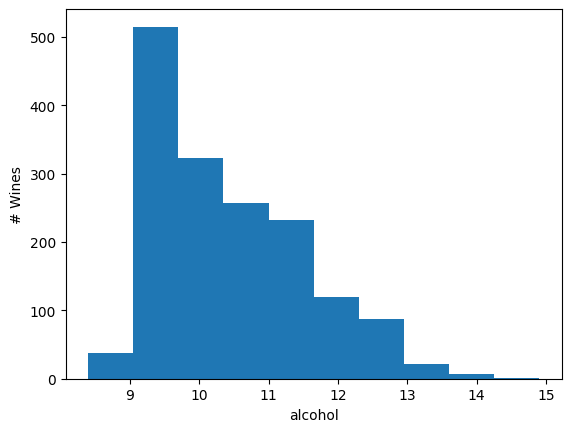

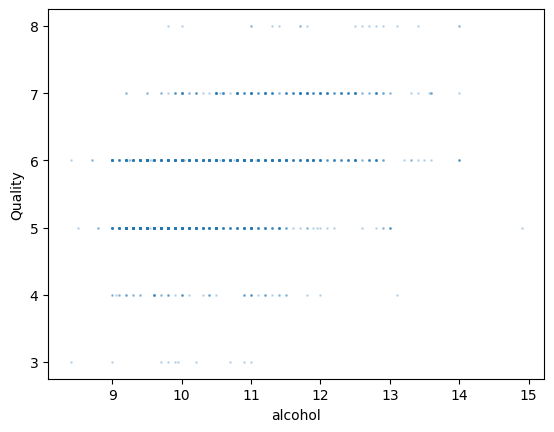

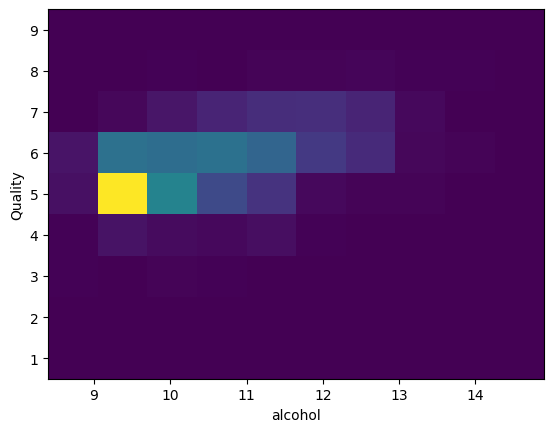

In [ ]:
# Analysing the red wine data
#df_red.head()

features = ["fixed acidity", "volatile acidity", "citric acid",
            "residual sugar", "chlorides", "free sulfur dioxide",
            "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]

cor_coef_lst = []
# Loop over all features
for i_feat, feat in enumerate(features):
    plt.clf()
    print(f"Feature: {feat}")
    print(f"Correlation coefficient in regards to quality: {np.corrcoef(df_red.iloc[:,i_feat],df_red.iloc[:,11])[0,1]:.3f}") # Calulate correlation coefficient
    cor_coef_lst.append(np.corrcoef(df_red.iloc[:,i_feat],df_red.iloc[:,11])[0,1])
    # 1D Histogram
    plt.hist(df_red.iloc[:,i_feat])
    plt.xlabel(feat)
    plt.ylabel("# Wines")
    plt.show()

    # Scatter Plot
    plt.scatter(df_red.iloc[:,i_feat],df_red.iloc[:,11], s=1, alpha=0.2)
    plt.xlabel(feat)
    plt.ylabel("Quality")
    plt.show()

    # Scatter Plot
    plt.hist2d(df_red.iloc[:,i_feat],df_red.iloc[:,11], bins=[10, np.arange(0.5, 10.5, 1)])
    plt.xlabel(feat)
    plt.ylabel("Quality")
    plt.show()

red_max_cor_coef = max(cor_coef_lst)

The highest feature correlation in regards to quality both for the white and the red wine was alcohol with a correlation coefficient of

In [ ]:
print(f'white: {white_max_cor_coef}')
print(f'red: {red_max_cor_coef}')

white: 0.4355747154613725
red: 0.47616632400113584


## PCA

In [ ]:
# copy dataset for backup
df_pca = df_white.copy()

# Separate features from the target variable
X = df_pca.drop("quality", axis=1)
y = df_pca["quality"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# create tabular form for data after scaled
df_X_scaled = pd.DataFrame(X_scaled)
df_X_scaled.columns = features

# print new data frame
df_X_scaled.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203


In [ ]:
# Create a PCA object and fit it to your data
pca = PCA()
pca.fit(X_scaled)

# Access the component matrix
component_matrix = pca.components_

# conver array to tabular
df_component_matrix = pd.DataFrame(component_matrix)

# Set the column names
df_component_matrix.columns = features

# Define the desired index labels
index_labels = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10', 'PC 11']

# Replace the index labels
df_component_matrix.set_axis(index_labels, axis='index')

# Transpose the DataFrame
transposed_data = df_component_matrix.transpose()  # or data.T

# Print the transposed DataFrame
transposed_data

,0,1,2,3,4,5,6,7,8,9,10
fixed acidity,0.157218,-0.587558,0.121368,0.018584,0.251048,-0.103531,-0.197849,0.588355,0.330523,0.131705,-0.171290
volatile acidity,0.005089,0.051728,-0.590971,0.274115,0.642617,0.122338,0.269355,0.028373,-0.145910,0.223722,-0.017057
citric acid,0.144050,-0.345295,0.504397,0.148514,0.053905,0.132097,0.705481,-0.152287,-0.202011,0.037351,-0.009721
residual sugar,0.427408,0.008749,-0.214320,-0.273765,0.011391,-0.289447,0.212760,-0.388186,0.408969,-0.094468,-0.490226
chlorides,0.212011,-0.008800,-0.102367,0.710712,-0.328628,0.395821,-0.079484,-0.100151,0.393535,-0.053374,-0.025399
free sulfur dioxide,0.300334,0.290355,0.279410,-0.305585,0.176912,0.494494,-0.166779,-0.081799,0.144073,0.567451,0.030908
total sulfur dioxide,0.406652,0.244032,0.124375,-0.060456,0.293010,0.276320,-0.067730,0.247314,-0.154540,-0.709120,-0.035561
density,0.511524,0.006297,-0.129203,-0.022061,-0.084588,-0.327651,0.110385,0.069026,0.087888,0.068374,0.759779
pH,-0.128832,0.581344,0.126672,0.097753,-0.119826,-0.193341,0.427313,0.533881,0.261298,0.110733,-0.141197
sulphates,0.043379,0.222695,0.433244,0.442060,0.400585,-0.481039,-0.308562,-0.270394,-0.011698,0.057708,-0.041833


In [ ]:
# Obtain eigenvalues and explained variance
eigenvalues = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_ * 100
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Create dataframes from the obtained values
eigenvalue_df = pd.DataFrame(eigenvalues)
explained_variance_ratio_df = pd.DataFrame(explained_variance_ratio)
cumulative_explained_variance_df = pd.DataFrame(cumulative_explained_variance)

# Concatenate the dataframes into a single dataframe
eigenvalue_proportion = pd.concat([eigenvalue_df, explained_variance_ratio_df, cumulative_explained_variance_df], axis=1)
eigenvalue_proportion.columns = ['Total', '%Variance', 'Cumulative%']
eigenvalue_proportion

,Total,%Variance,Cumulative%
0,3.222912,29.293217,29.293217
1,1.575562,14.320363,43.613580
2,1.221921,11.106103,54.719683
3,1.018730,9.259294,63.978977
4,0.973533,8.848496,72.827474
5,0.938933,8.534014,81.361487
6,0.726746,6.605437,87.966924
7,0.599481,5.448713,93.415637
8,0.414228,3.764942,97.180580
9,0.289546,2.631701,99.812281


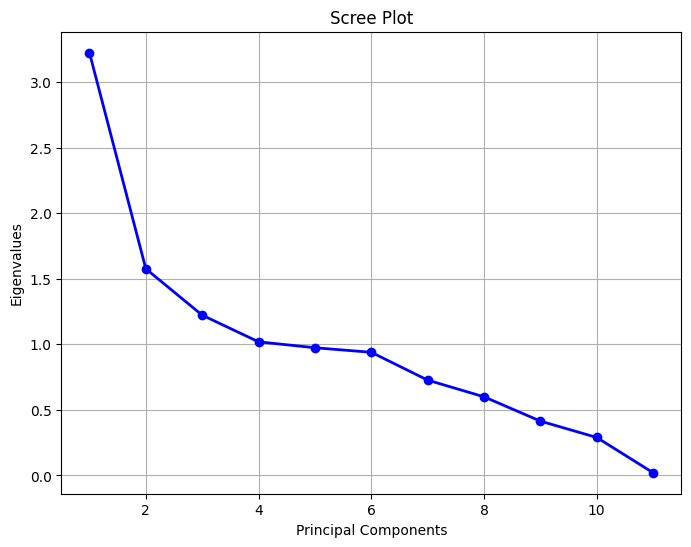

In [ ]:
# Plot the scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'bo-', linewidth=2)
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [ ]:
# calculate communality of each component
# Drop columns 6 to 11
transposed_data = transposed_data.drop(columns=transposed_data.columns[5:11])


# sum square each observation from PC1 to PC5
transposed_data['sum_of_squares'] = transposed_data.apply(lambda x: sum(x ** 2), axis=1)

transposed_data

,0,1,2,3,4,sum_of_squares
fixed acidity,0.157218,-0.587558,0.121368,0.018584,0.251048,0.448043
volatile acidity,0.005089,0.051728,-0.590971,0.274115,0.642617,0.840044
citric acid,0.144050,-0.345295,0.504397,0.148514,0.053905,0.419357
residual sugar,0.427408,0.008749,-0.214320,-0.273765,0.011391,0.303765
chlorides,0.212011,-0.008800,-0.102367,0.710712,-0.328628,0.668614
free sulfur dioxide,0.300334,0.290355,0.279410,-0.305585,0.176912,0.377257
total sulfur dioxide,0.406652,0.244032,0.124375,-0.060456,0.293010,0.329897
density,0.511524,0.006297,-0.129203,-0.022061,-0.084588,0.286031
pH,-0.128832,0.581344,0.126672,0.097753,-0.119826,0.394519
sulphates,0.043379,0.222695,0.433244,0.442060,0.400585,0.595061


In [ ]:
# Create a PCA object with the desired number of components
pca = PCA(n_components=5)

# Fit and transform the data into principal components
principal_components = pca.fit_transform(X_scaled)

# convert principal component into dataframe
principal_components_df = pd.DataFrame(principal_components)
principal_components_df.columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5']

principal_components_df

,PC 1,PC 2,PC 3,PC 4,PC 5
0,3.676944,-0.545233,-0.930422,-1.135374,-0.292855
1,-0.644588,0.430770,-0.356331,0.999117,-0.714078
2,0.155291,-1.189800,-0.017532,0.270219,-0.367706
3,1.455374,0.099680,-0.001956,-0.423022,-0.469981
4,1.455374,0.099680,-0.001956,-0.423022,-0.469981
...,...,...,...,...,...
4893,-2.094367,0.390789,0.325364,0.088145,-0.755337
4894,1.295014,0.490753,-0.066307,-0.381234,0.267347
4895,-0.779731,-0.408480,-0.664677,-0.134766,-0.808279
4896,-3.407302,0.915744,-0.268297,-0.762126,-0.080705


<Axes: >

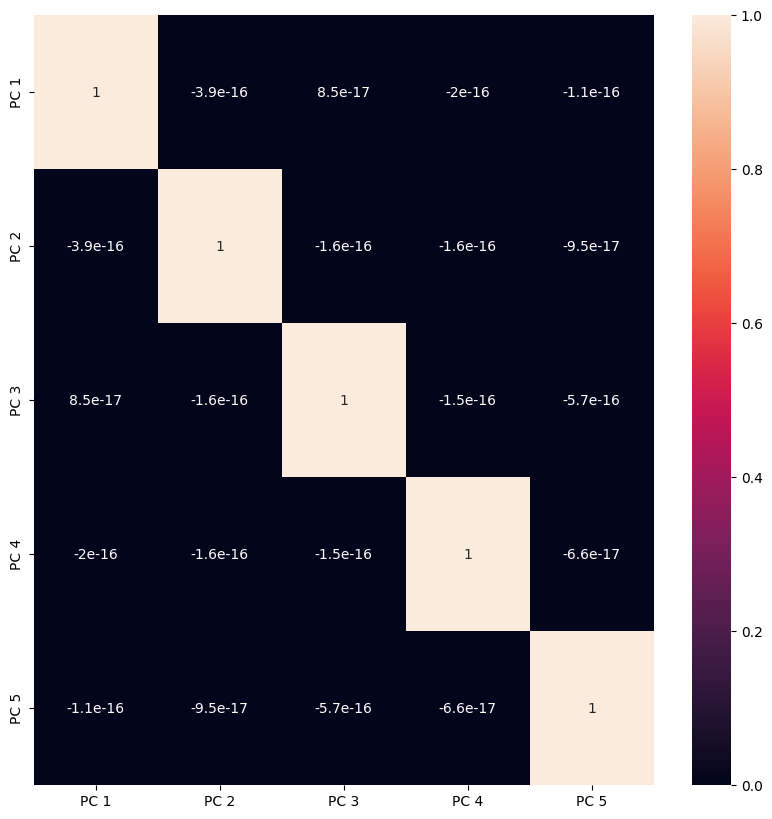

In [ ]:
# visualize correlation with heatmap
# check correlation among variables
corr = principal_components_df.corr()

# creat heatmap of correlation
plt.figure(figsize = [10, 10], facecolor = 'white')
sns.heatmap(corr, annot = True)

## FA

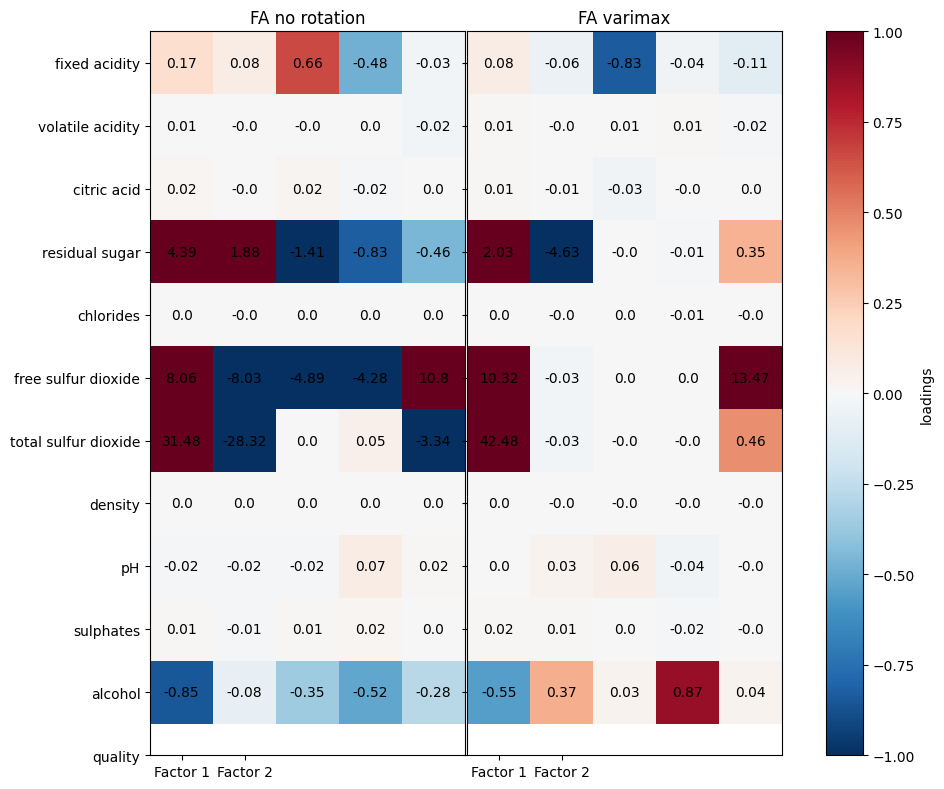

In [ ]:
#X = StandardScaler().fit_transform(df_white)  # Standardize the data
factors = 5 # BAsed on previous PCA
#  a list of 2 tuples containing titles for and instances of or class
fas = [
    ("FA no rotation", FactorAnalysis(n_components = factors)),
    ("FA varimax", FactorAnalysis(n_components = factors, rotation="varimax")),
]

#  Let's prepare some plots on one canvas (subplots)
fig, axes = plt.subplots(ncols=len(fas), figsize=(10, 8))

'''
And loop over the variants of our analysis `fas`, zipped with the
plot axes `axes`
'''
for ax, (title, fa) in zip(axes, fas):
    #  Fit the model to the standardized white wine data
    fa = fa.fit(X)
    #  and transpose the component (loading) matrix
    factor_matrix = fa.components_.T
    #  Plot the data as a heat map
    im = ax.imshow(factor_matrix, cmap="RdBu_r", vmax=1, vmin=-1)
    #  and add the corresponding value to the center of each cell
    for (i,j), z in np.ndenumerate(factor_matrix):
        ax.text(j, i, str(z.round(2)), ha="center", va="center")
    #  Tell matplotlib about the metadata of the plot
    ax.set_yticks(np.arange(len(df_white.columns)))
    if ax.get_subplotspec().is_first_col():
        ax.set_yticklabels(df_white.columns)
    else:
        ax.set_yticklabels([])
    ax.set_title(title)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Factor 1", "Factor 2"])
    #  and squeeze the axes tight, to save space
    plt.tight_layout()

#  and add a colorbar
cb = fig.colorbar(im, ax=axes, location='right', label="loadings")
#  show us the plot
plt.show()

##ML
For comparison a ML model is applied

In [ ]:
# Importing data
data_white = np.genfromtxt('sample_data/winequality-white.csv',delimiter=";",skip_header=1)
data_red = np.genfromtxt('sample_data/winequality-white.csv',delimiter=";",skip_header=1)

In [ ]:
print("White wine data:", data_white.shape)
print("White red data:", data_red.shape)

# Preparing for proper training
np.random.shuffle(data_white) # randomly sort
np.random.shuffle(data_red) # randomly sort


# takeing the first 3000 examples for training
X_train_white = data_white[:3000,:11] # all features except last column
y_train_white = data_white[:3000,11]  # quality column

# and the remaining examples for testing
X_test_white = data_white[3000:,:11] # all features except last column
y_test_white = data_white[3000:,11] # quality column

print("First example for white:")
print("Features:", X_train_white[0])
print("Quality:", y_train_white[0])


# takeing the first 3000 examples for training
X_train_red = data_red[:3000,:11] # all features except last column
y_train_red = data_red[:3000,11]  # quality column

# and the remaining examples for testing
X_test_red = data_red[3000:,:11] # all features except last column
y_test_red = data_red[3000:,11] # quality column

print("First example for red:")
print("Features:", X_train_red[0])
print("Quality:", y_train_red[0])

White wine data: (4898, 12)
White red data: (4898, 12)
First example for white:
Features: [6.3000e+00 2.6000e-01 4.2000e-01 7.1000e+00 4.5000e-02 6.2000e+01
 2.0900e+02 9.9544e-01 3.2000e+00 5.3000e-01 9.5000e+00]
Quality: 6.0
First example for red:
Features: [6.7000e+00 2.7000e-01 3.3000e-01 3.6000e+00 3.4000e-02 9.0000e+00
 4.5000e+01 9.9144e-01 3.0800e+00 4.0000e-01 1.0500e+01]
Quality: 6.0


Feature: fixed acidity
Correlation coefficient: -0.115


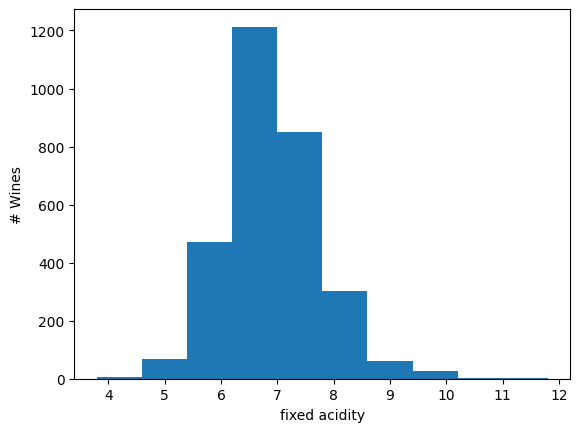

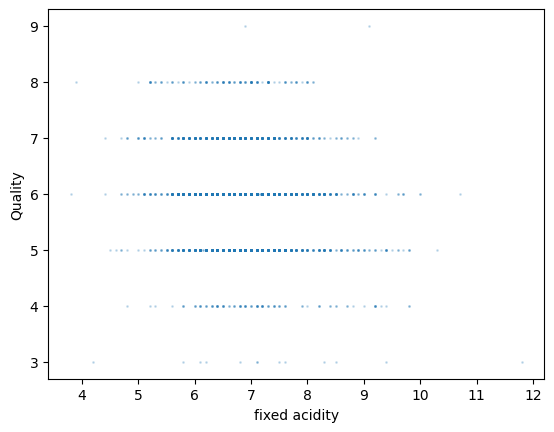

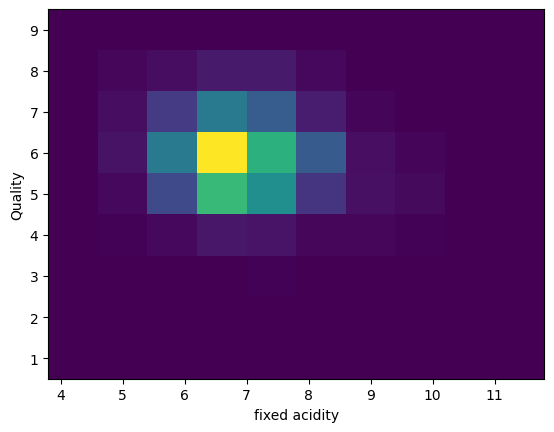

Feature: volatile acidity
Correlation coefficient: -0.182


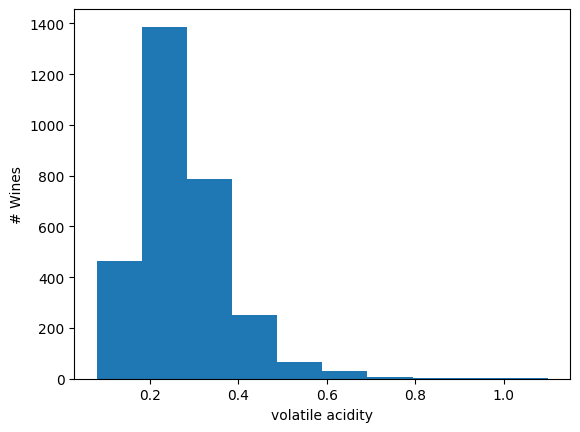

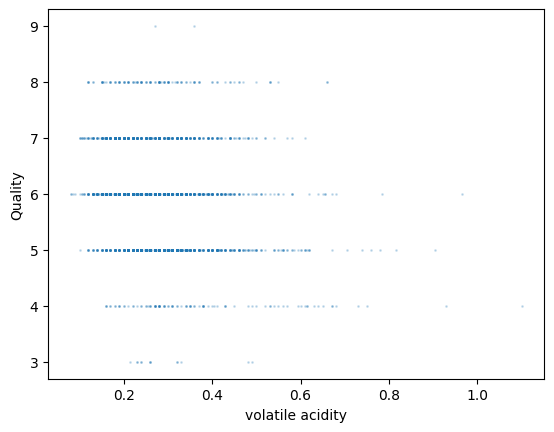

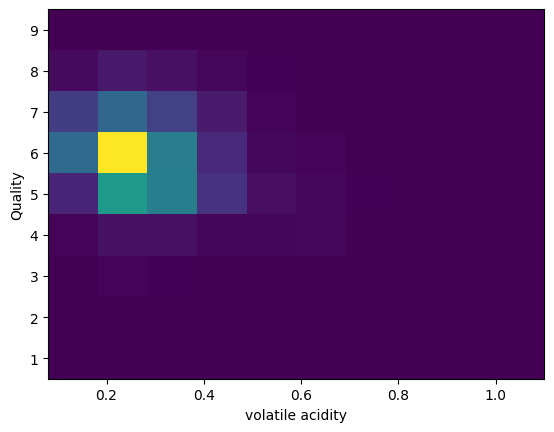

Feature: citric acid
Correlation coefficient: -0.007


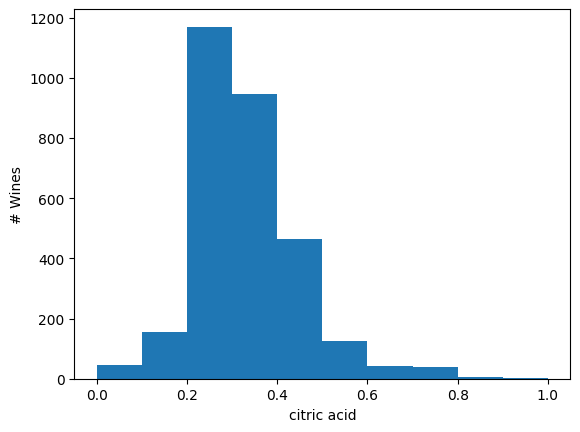

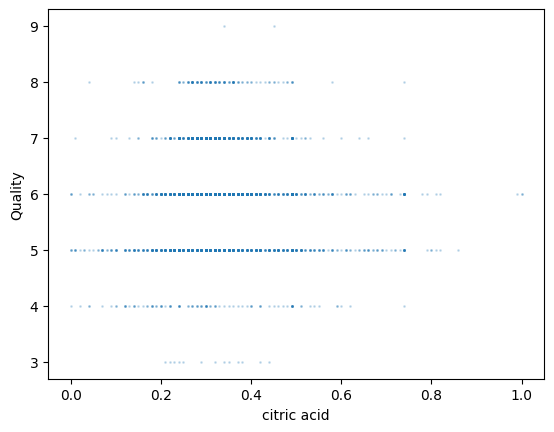

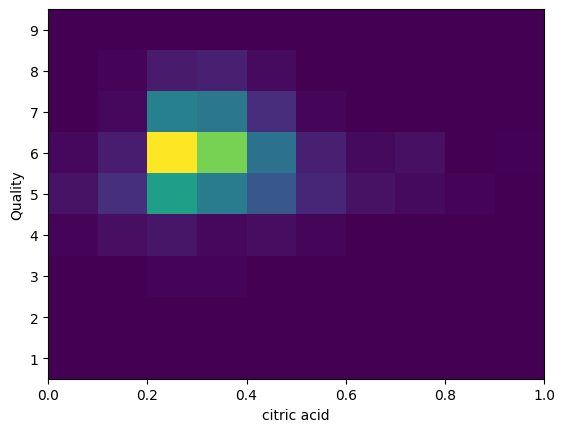

Feature: residual sugar
Correlation coefficient: -0.104


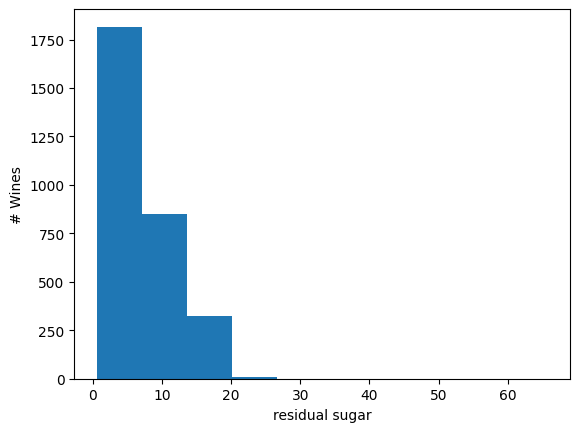

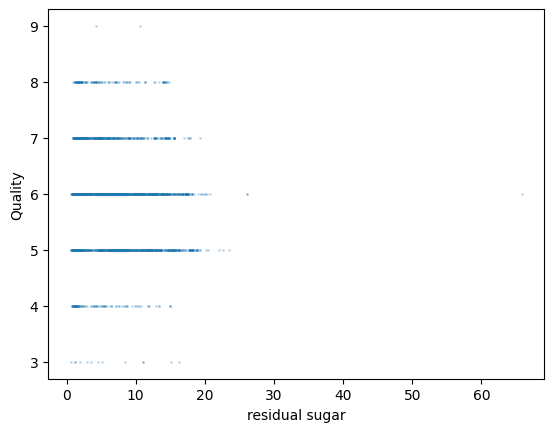

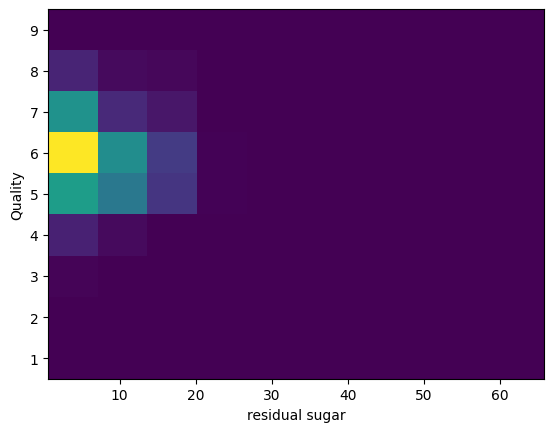

Feature: chlorides
Correlation coefficient: -0.202


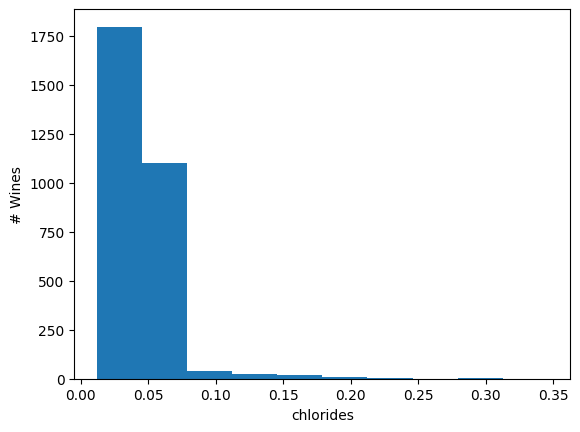

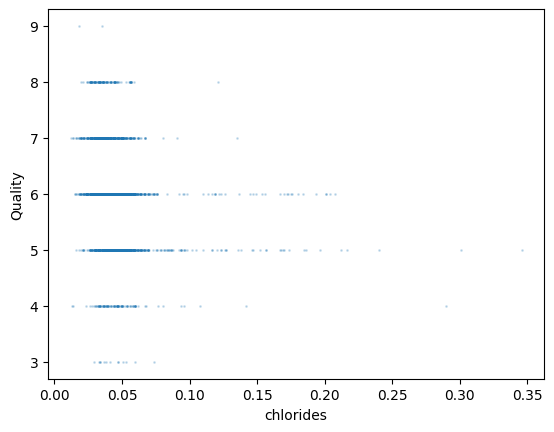

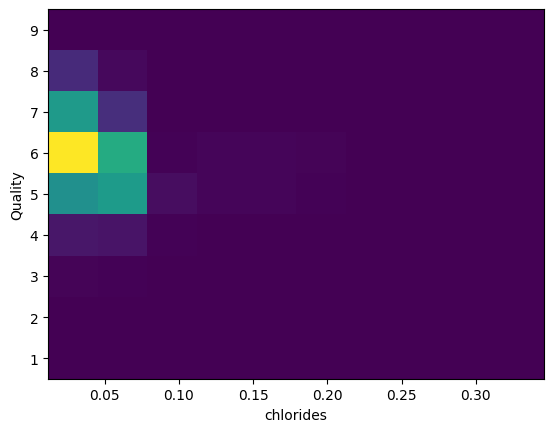

Feature: free sulfur dioxide
Correlation coefficient: -0.018


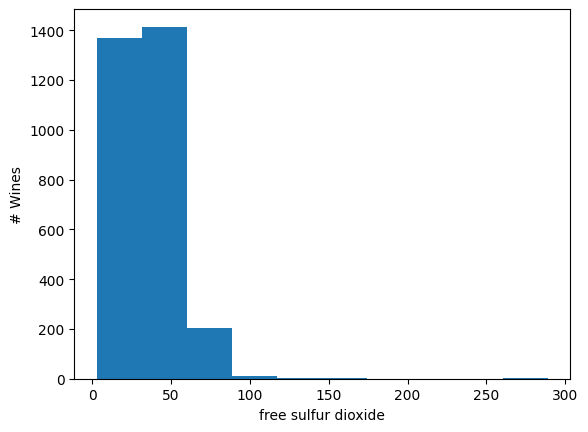

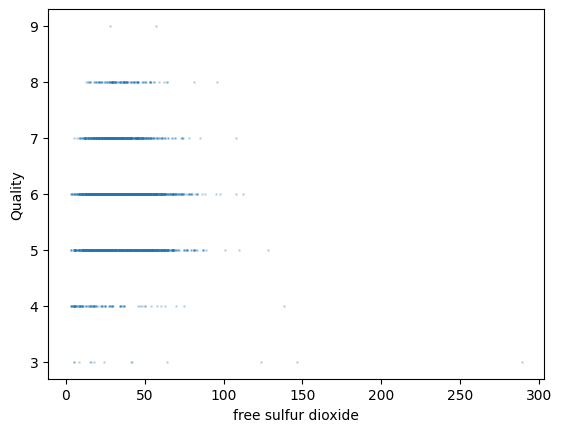

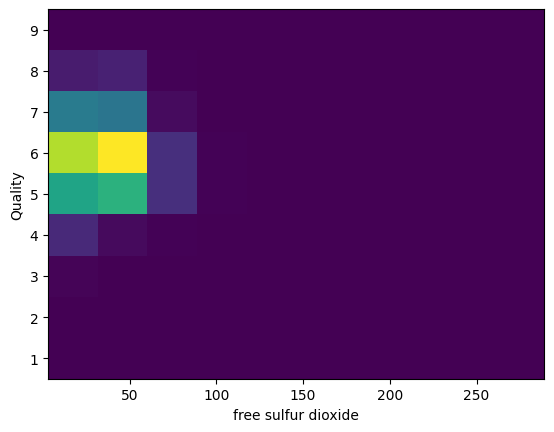

Feature: total sulfur dioxide
Correlation coefficient: -0.180


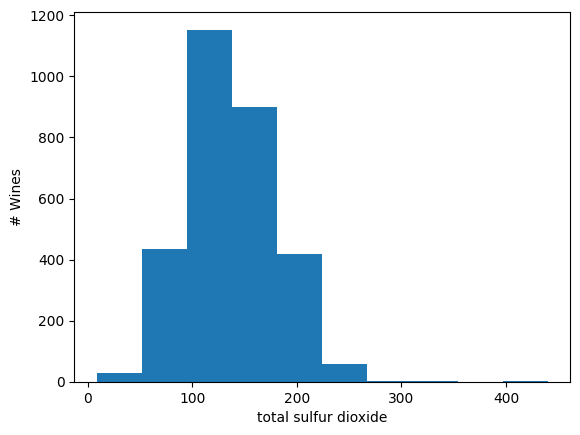

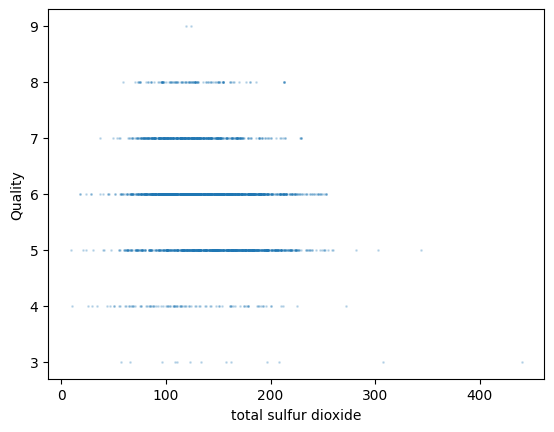

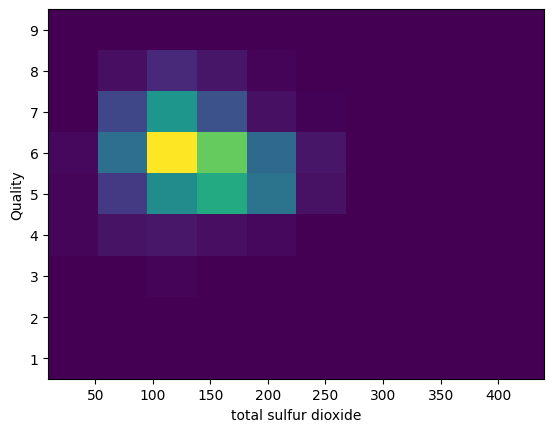

Feature: density
Correlation coefficient: -0.300


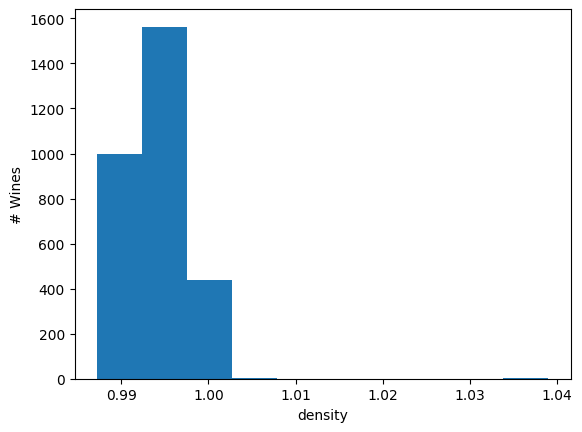

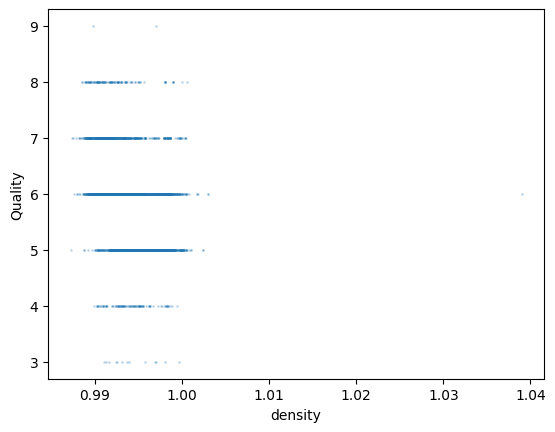

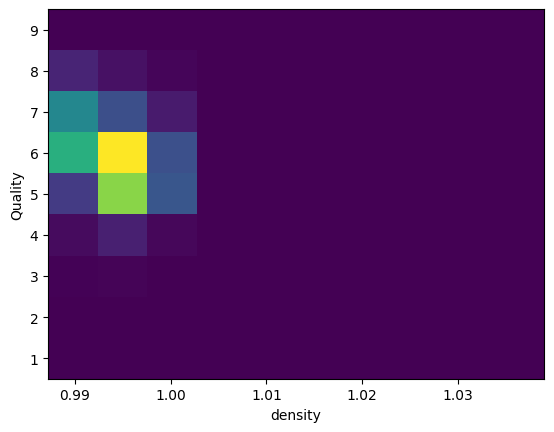

Feature: pH
Correlation coefficient: 0.120


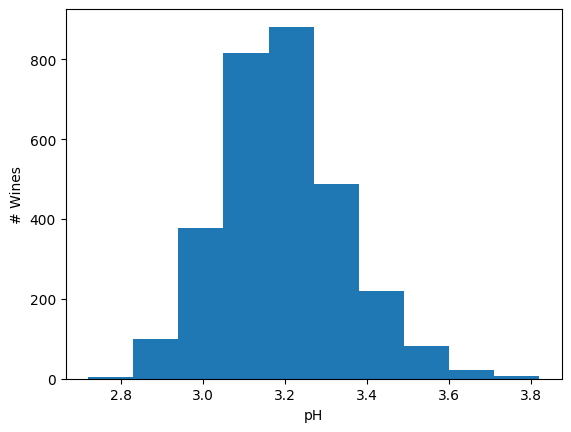

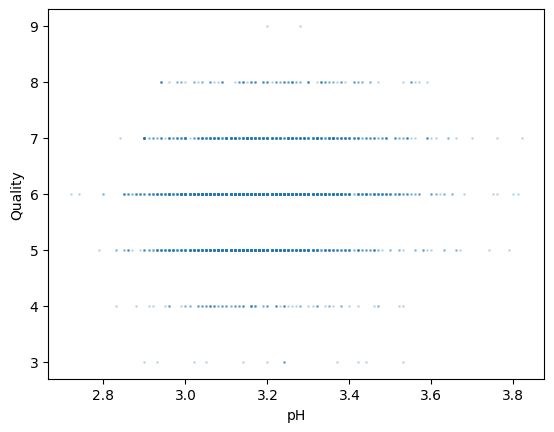

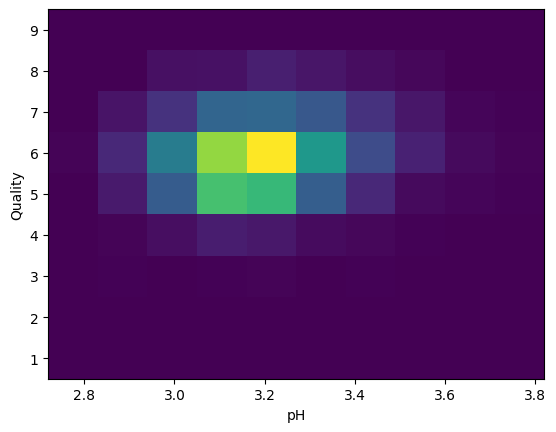

Feature: sulphates
Correlation coefficient: 0.067


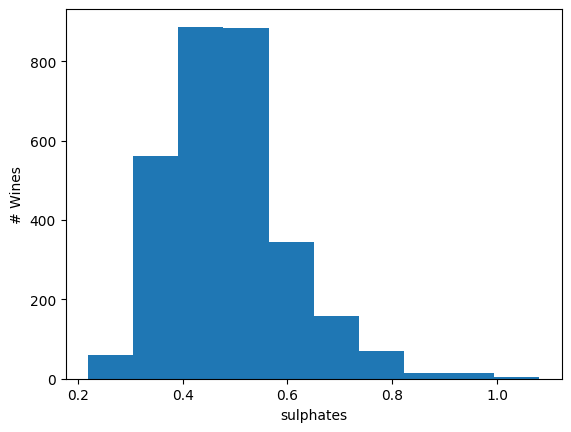

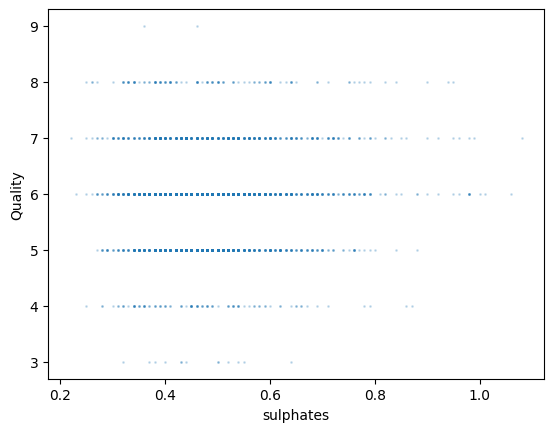

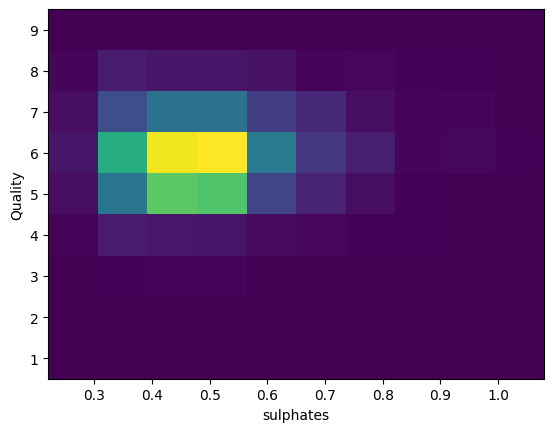

Feature: alcohol
Correlation coefficient: 0.426


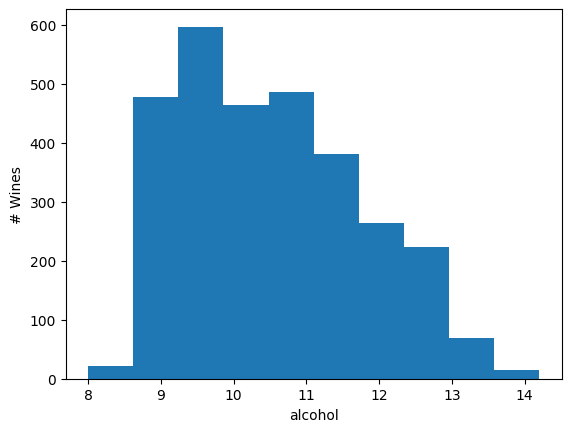

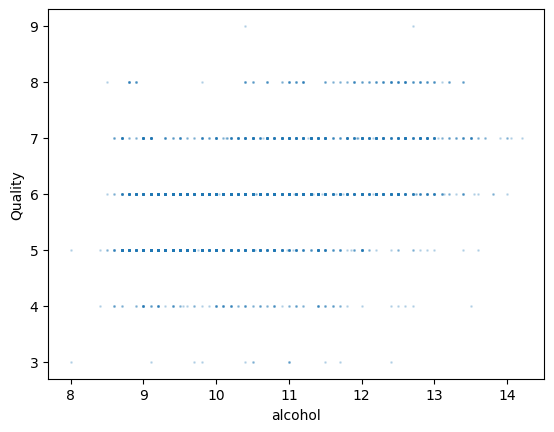

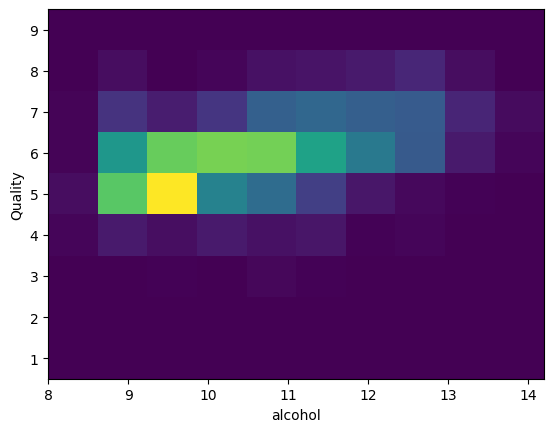

In [ ]:
#Visualising the data for white

features = ["fixed acidity", "volatile acidity", "citric acid",
            "residual sugar", "chlorides", "free sulfur dioxide",
            "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]

# Loop over all features
for i_feat, feat in enumerate(features):
    plt.clf()
    print(f"Feature: {feat}")
    print(f"Correlation coefficient: {np.corrcoef(X_train_white[:,i_feat],y_train_white)[0,1]:.3f}") # Calulate correlation coefficient

    # 1D Histogram
    plt.hist(X_train_white[:,i_feat])
    plt.xlabel(feat)
    plt.ylabel("# Wines")
    plt.show()

    # Scatter Plot
    plt.scatter(X_train_white[:,i_feat],y_train_white, s=1, alpha=0.2)
    plt.xlabel(feat)
    plt.ylabel("Quality")
    plt.show()

    # Scatter Plot
    plt.hist2d(X_train_white[:,i_feat],y_train_white, bins=[10, np.arange(0.5, 10.5, 1)])
    plt.xlabel(feat)
    plt.ylabel("Quality")
    plt.show()


Feature: fixed acidity
Correlation coefficient: -0.114


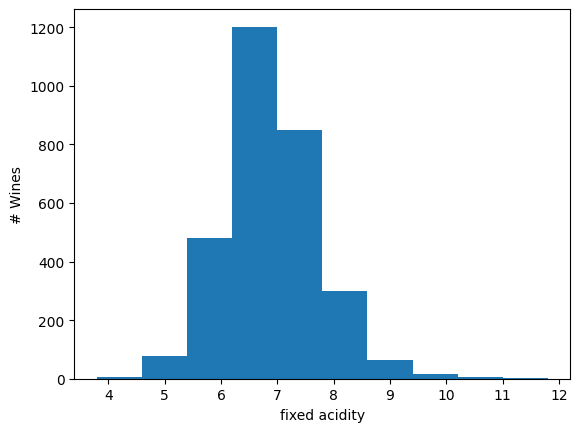

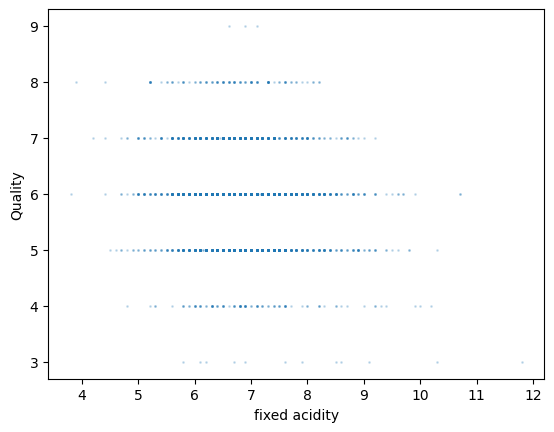

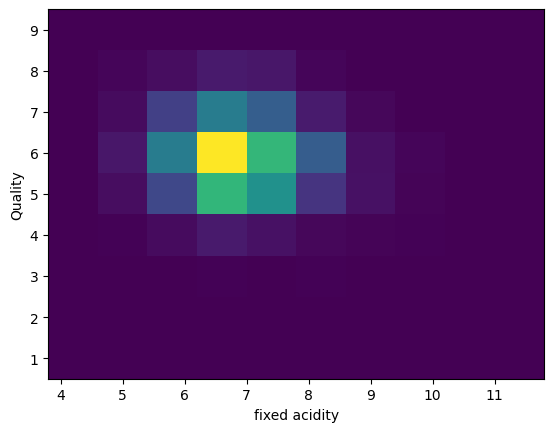

Feature: volatile acidity
Correlation coefficient: -0.212


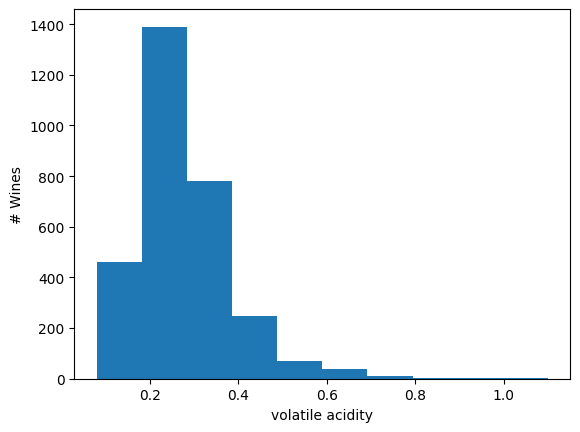

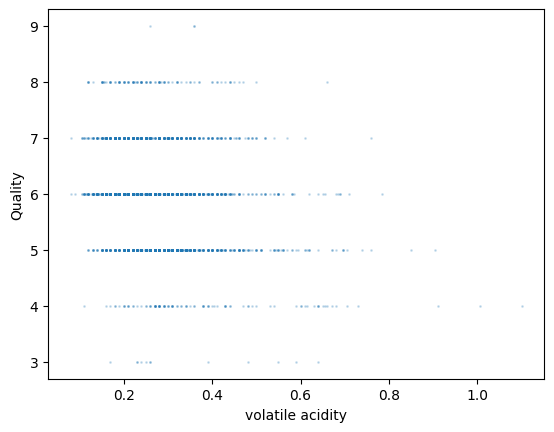

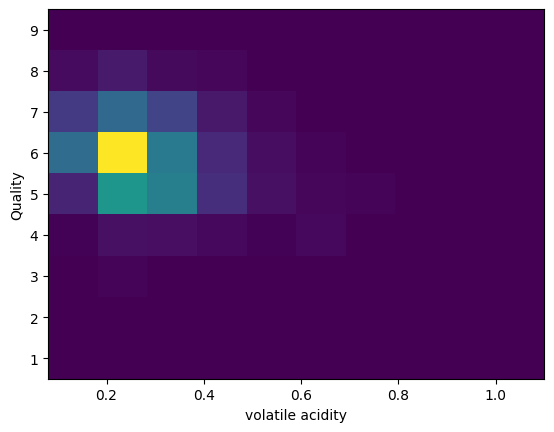

Feature: citric acid
Correlation coefficient: -0.001


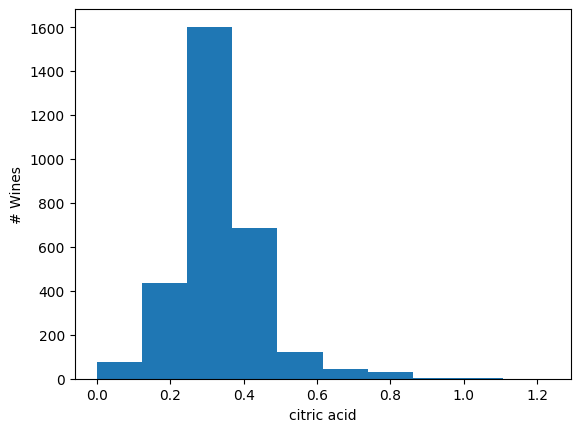

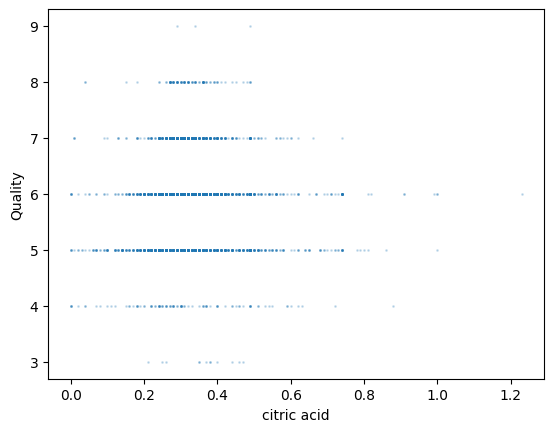

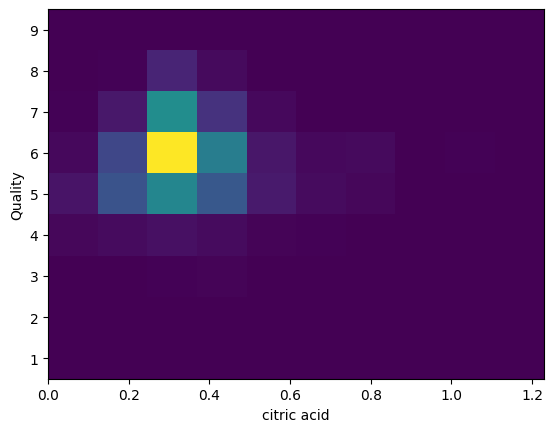

Feature: residual sugar
Correlation coefficient: -0.097


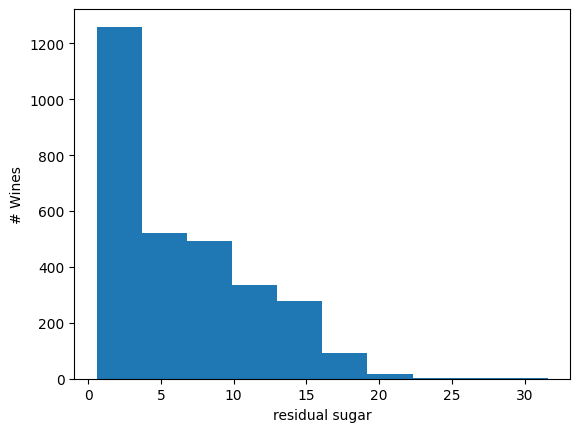

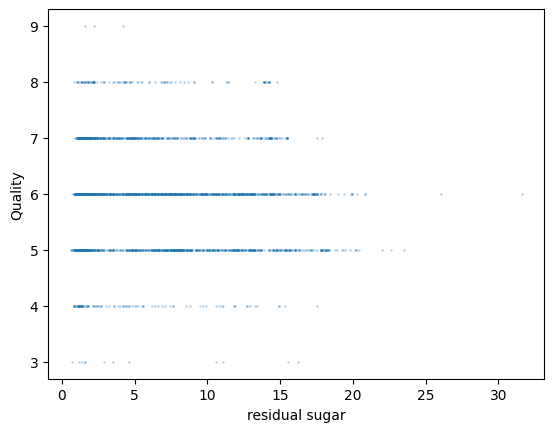

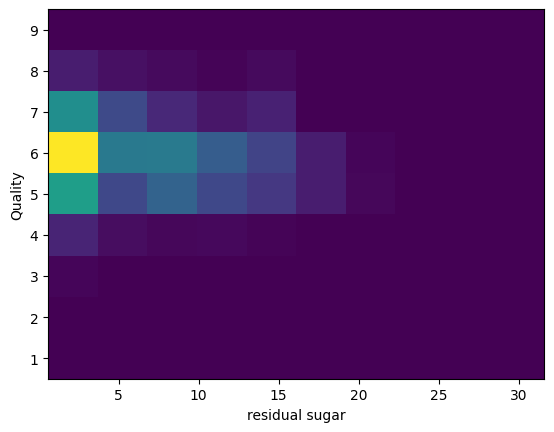

Feature: chlorides
Correlation coefficient: -0.211


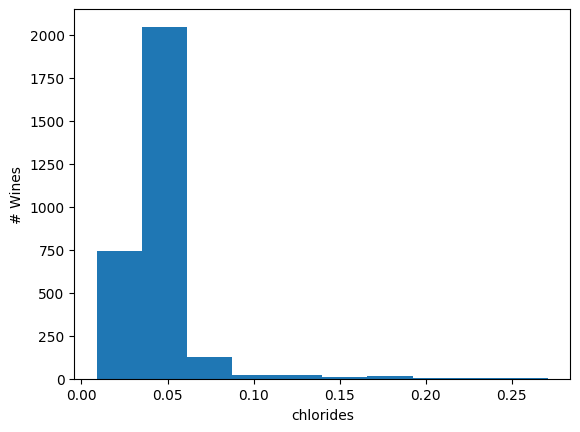

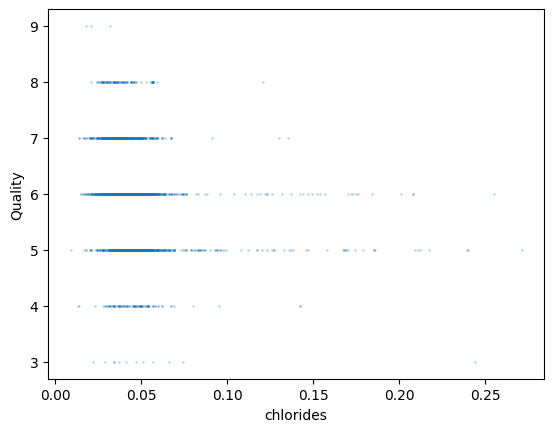

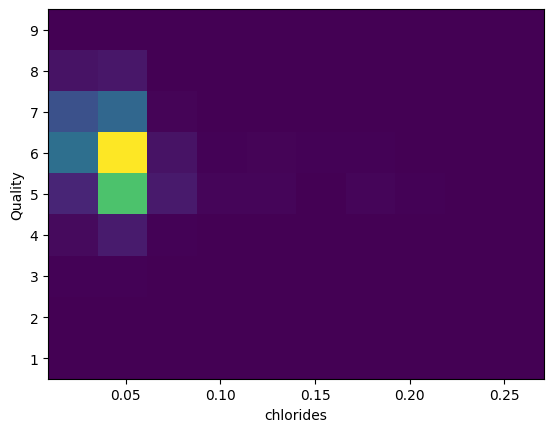

Feature: free sulfur dioxide
Correlation coefficient: 0.024


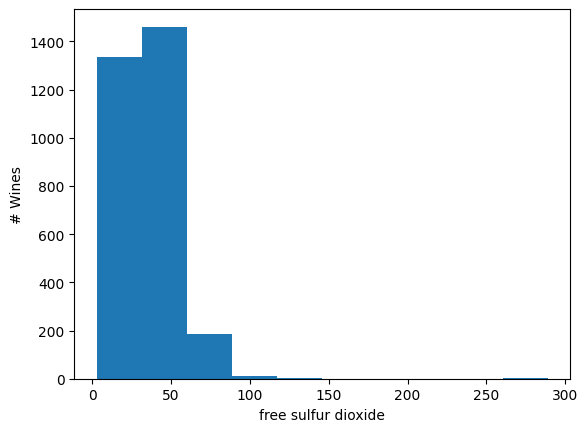

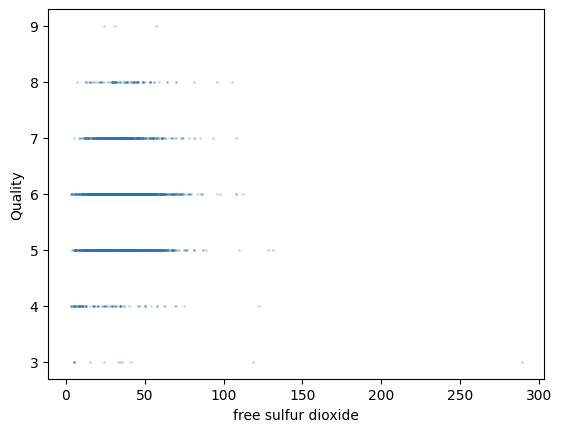

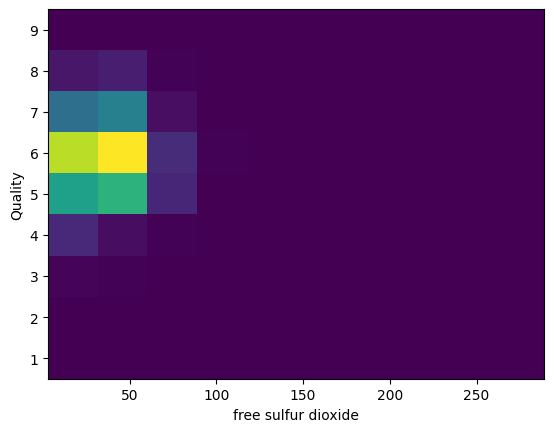

Feature: total sulfur dioxide
Correlation coefficient: -0.175


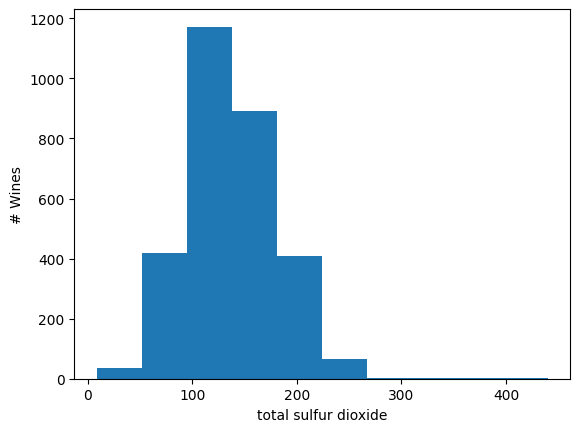

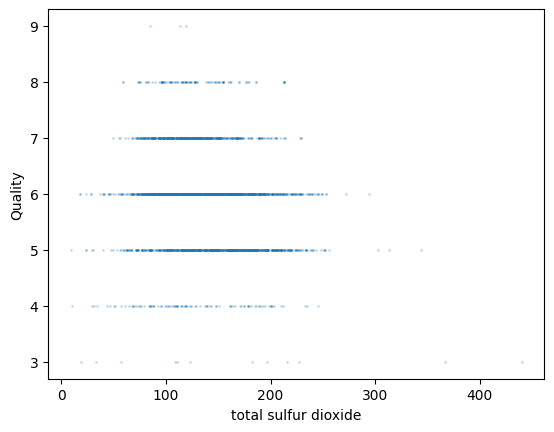

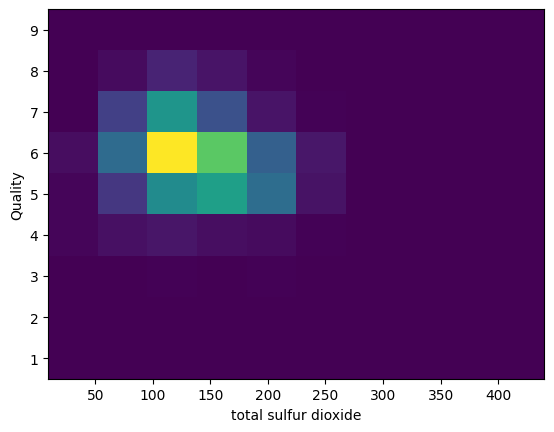

Feature: density
Correlation coefficient: -0.311


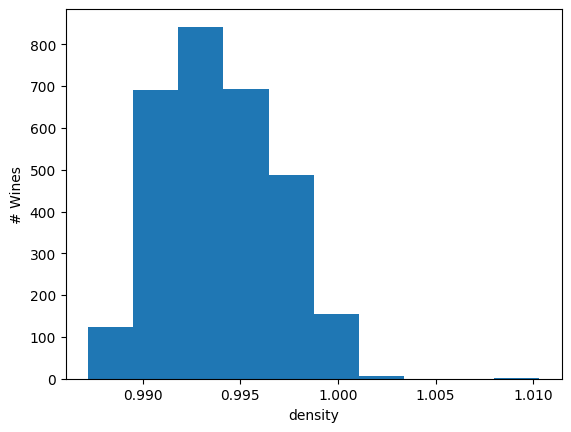

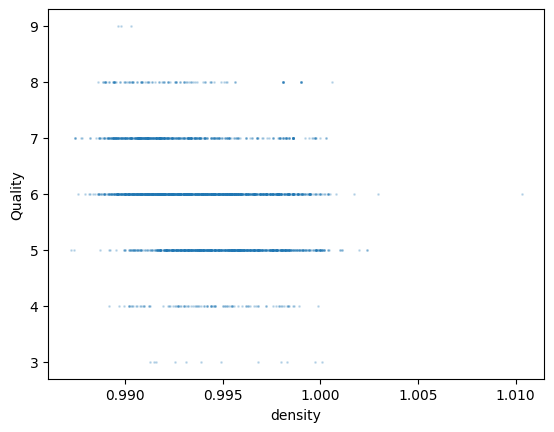

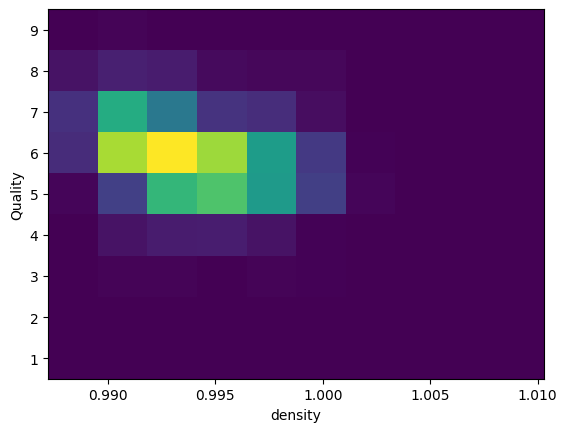

Feature: pH
Correlation coefficient: 0.101


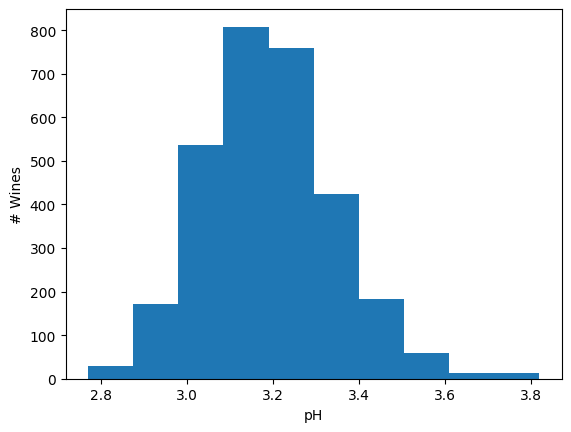

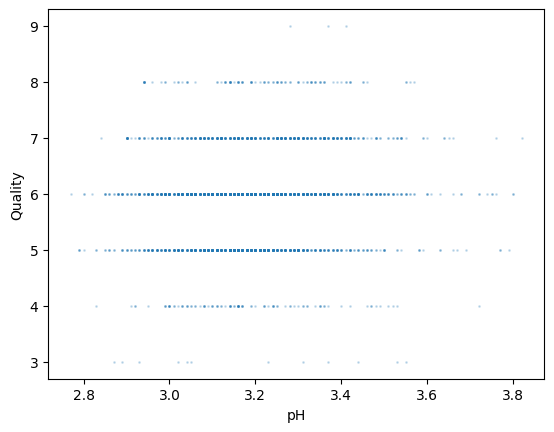

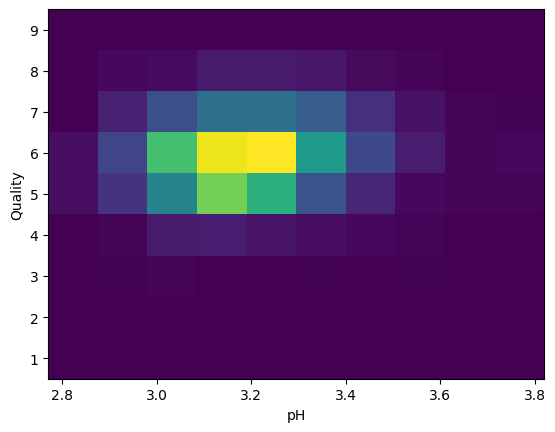

Feature: sulphates
Correlation coefficient: 0.065


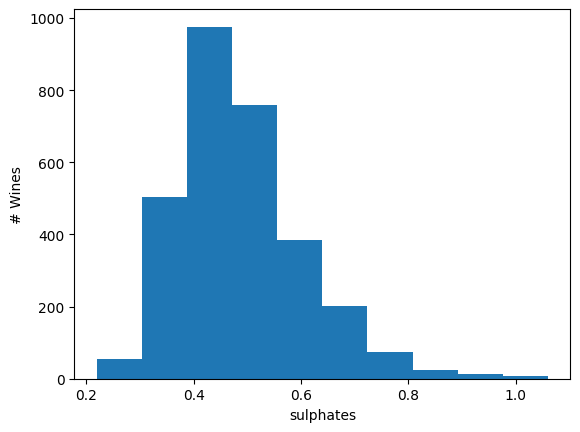

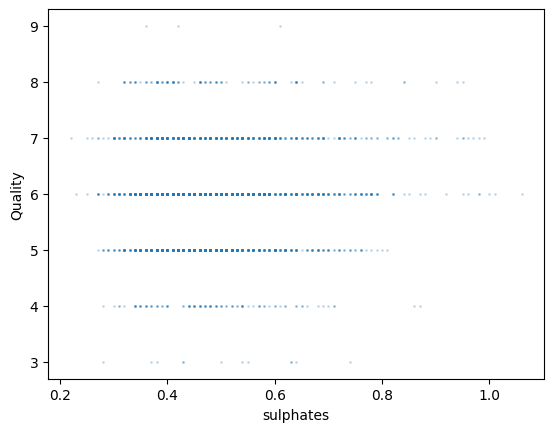

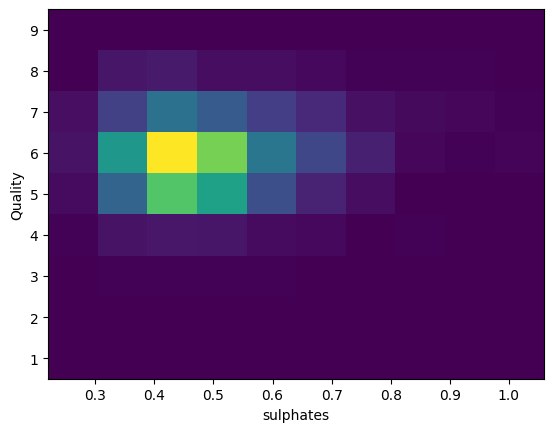

Feature: alcohol
Correlation coefficient: 0.419


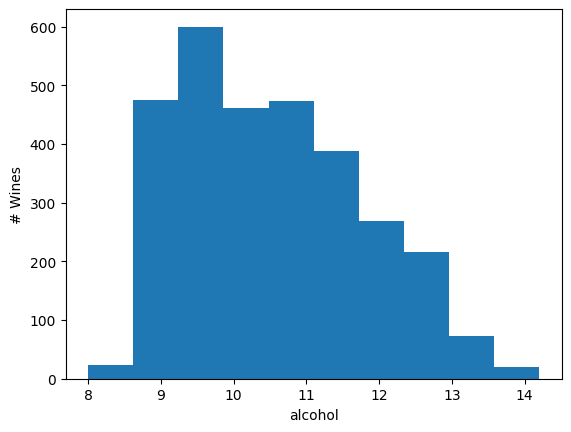

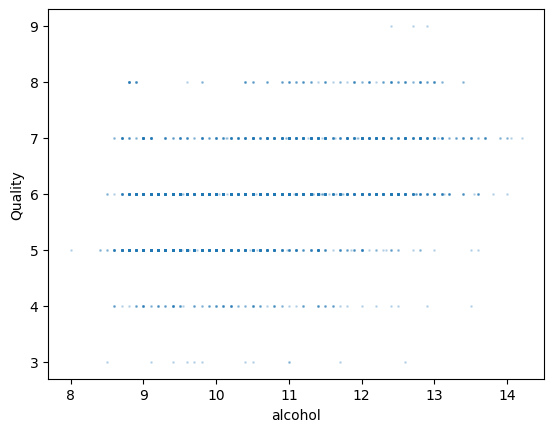

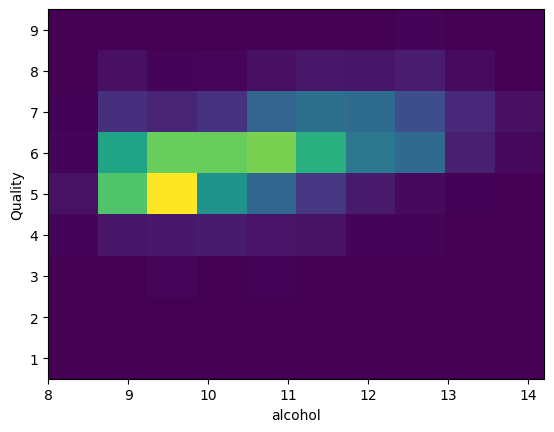

In [ ]:
# Visualising the data for red, reusing features
# Looping over all features
for i_feat, feat in enumerate(features):
    plt.clf()
    print(f"Feature: {feat}")
    print(f"Correlation coefficient: {np.corrcoef(X_train_red[:,i_feat],y_train_red)[0,1]:.3f}") # Calulate correlation coefficient

    # 1D Histogram
    plt.hist(X_train_red[:,i_feat])
    plt.xlabel(feat)
    plt.ylabel("# Wines")
    plt.show()

    # Scatter Plot
    plt.scatter(X_train_red[:,i_feat],y_train_red, s=1, alpha=0.2)
    plt.xlabel(feat)
    plt.ylabel("Quality")
    plt.show()

    # Scatter Plot
    plt.hist2d(X_train_red[:,i_feat],y_train_red, bins=[10, np.arange(0.5, 10.5, 1)])
    plt.xlabel(feat)
    plt.ylabel("Quality")
    plt.show()


In [ ]:
# Calulating weights using train data
# w = (X_T X)^{-1} X_T y
w_white = np.linalg.inv(X_train_white.T @ X_train_white) @ X_train_white.T @ y_train_white
print(w_white.shape)
print(w_white)

w_red = np.linalg.inv(X_train_red.T @ X_train_red) @ X_train_red.T @ y_train_red
print(w_red.shape)
print(w_red)

(11,)
[-5.71645791e-02 -2.02910380e+00 -9.55059981e-03  2.32236196e-02
 -6.54049726e-01  3.02384935e-03 -5.68793192e-04  1.76879272e+00
  2.63309522e-01  5.35828649e-01  3.64414651e-01]
(11,)
[-3.83935960e-02 -1.96258745e+00 -4.57212699e-02  2.19980908e-02
 -1.27821586e+00  5.78104034e-03 -1.28507695e-03  2.22483218e+00
  1.81916280e-01  4.57906224e-01  3.40633182e-01]


(1898, 11) (11,) (1898,)
[7.600e+00 4.450e-01 4.400e-01 1.450e+01 4.500e-02 6.800e+01 2.120e+02
 9.986e-01 3.480e+00 3.600e-01 1.000e+01]
[-5.71645791e-02 -2.02910380e+00 -9.55059981e-03  2.32236196e-02
 -6.54049726e-01  3.02384935e-03 -5.68793192e-04  1.76879272e+00
  2.63309522e-01  5.35828649e-01  3.64414651e-01]
5.570421962351075
Correlation coefficient: 0.534


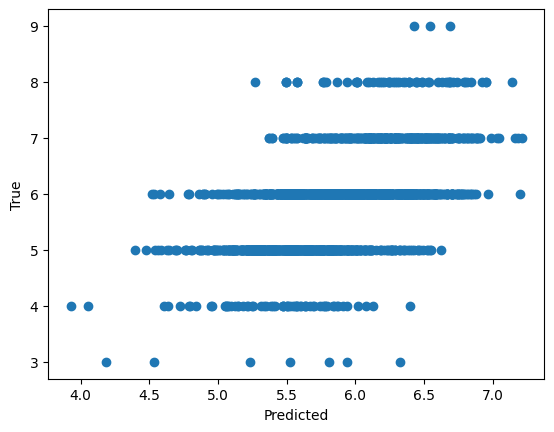

In [ ]:
# Evaluate linear regression model for white
y_pred_white= X_test_white @ w_white
print(X_test_white.shape,w_white.shape,y_pred_white.shape)

print(X_test_white[0])
print(w_white)
print(y_pred_white[0])


print(f"Correlation coefficient: {np.corrcoef(y_pred_white,y_test_white)[0,1]:.3f}")

# Prepare scatter plot
plt.scatter(y_pred_white,y_test_white)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

(1898, 11) (11,) (1898,)
[6.9000e+00 2.8000e-01 2.8000e-01 1.2200e+01 4.2000e-02 5.2000e+01
 1.3900e+02 9.9522e-01 3.0300e+00 5.6000e-01 1.0400e+01]
[-3.83935960e-02 -1.96258745e+00 -4.57212699e-02  2.19980908e-02
 -1.27821586e+00  5.78104034e-03 -1.28507695e-03  2.22483218e+00
  1.81916280e-01  4.57906224e-01  3.40633182e-01]
6.073854179952299
Correlation coefficient: 0.533


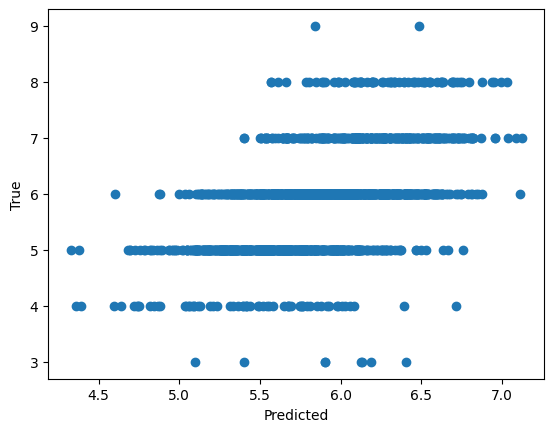

In [ ]:
# Evaluate linear regression model for red
y_pred_red = X_test_red @ w_red
print(X_test_red.shape,w_red.shape,y_pred_red.shape)

print(X_test_red[0])
print(w_red)
print(y_pred_red[0])


print(f"Correlation coefficient: {np.corrcoef(y_pred_red,y_test_red)[0,1]:.3f}")

# Prepare scatter plot
plt.scatter(y_pred_red,y_test_red)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()